In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from umap import UMAP
import sys
sys.path.append('..')
from utils import load_pickle, save_pickle, seed_everything
seed_everything(42)

/home/sagawa/miniconda3/envs/reactiont5/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
target_embedding = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/embedding_mean_v5.npy")
print(target_embedding.shape)

(1799731, 768)


In [3]:
sample_idx_target = np.random.choice(target_embedding.shape[0], 10000, replace=False)
target_embedding = target_embedding[sample_idx_target]

In [4]:
# umap = UMAP(n_components=2)
# target_embedding_umap = umap.fit_transform(target_embedding)

# save_pickle("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/umap_v5.pkl", umap)
# np.save("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/embedding_umap_v5.npy", target_embedding_umap)
target_embedding_umap = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/embedding_umap_v5.npy")
print(target_embedding_umap.shape)

(10000, 2)


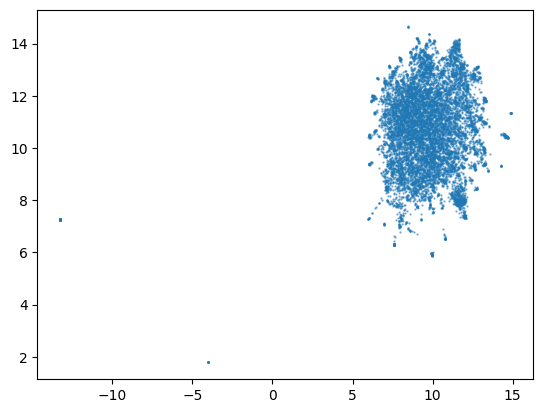

In [5]:
fig, ax = plt.subplots()
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=0.5)

In [6]:
query_embedding = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/embedding_mean_v5.npy")
print(query_embedding.shape)

(5004, 768)


In [7]:
# query_embedding_umap = umap.transform(query_embedding)
# np.save("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/query_embedding_umap_v5.npy", query_embedding_umap)
query_embedding_umap = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/query_embedding_umap_v5.npy")
print(query_embedding_umap.shape)

(5004, 2)


/tmp/ipykernel_1885513/1249586914.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1885513/1249586914.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


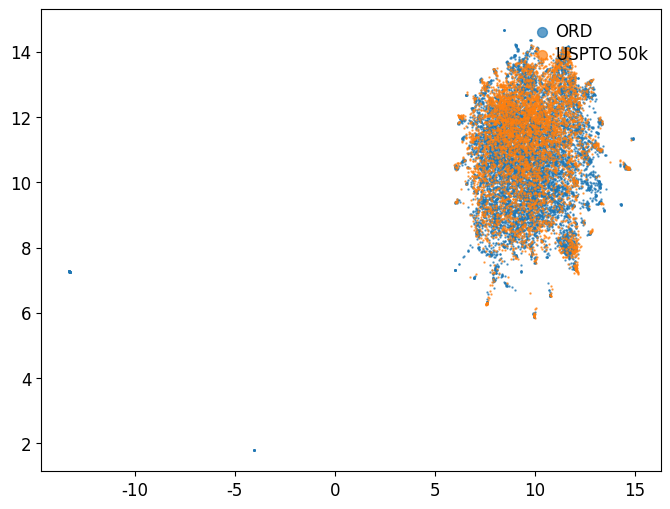

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="USPTO 50k")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
# ax.set_xlim(7, 16)
# ax.set_ylim(0, 8)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1885513/1811509994.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1885513/1811509994.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


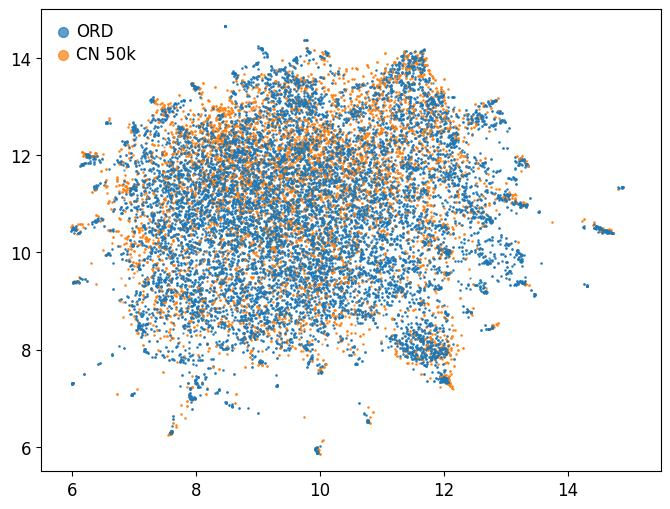

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.7, s=0.5, label="ORD")
# ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.7, s=0.5, label="USPTO 50k")
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="CN 50k" if i == 0 else None, color="#ff7f0e")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
# ax.set_xticks(range(4, 13, 2))
# ax.set_yticks(range(-1, 9, 2))
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)

ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

In [11]:
df_target = pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/input_data_v5.csv")
df_target = df_target.iloc[sample_idx_target].reset_index(drop=True)
df_query = pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/input_data_v5.csv")

# df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))
# df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))

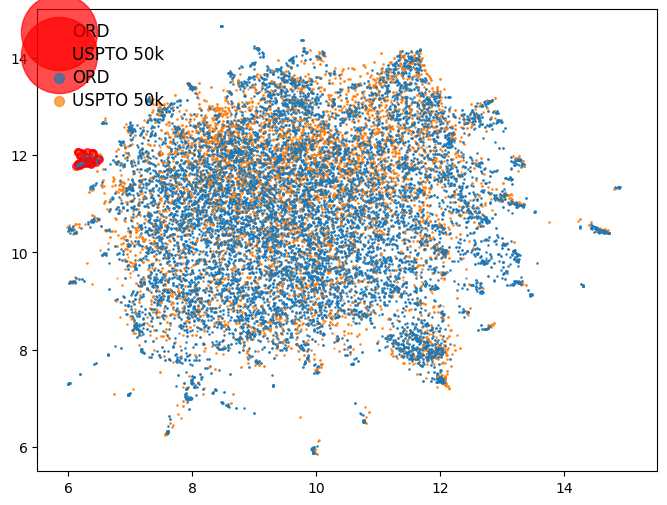

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
selected_target_embedding_umap = target_embedding_umap[(target_embedding_umap[:, 0] < 6.5) & (target_embedding_umap[:, 1] > 11.7)]
selected_df_target = df_target[(target_embedding_umap[:, 0] < 6.5) & (target_embedding_umap[:, 1] > 11.7)]
selected_query_embedding_umap = query_embedding_umap[(query_embedding_umap[:, 0] < 6.5) & (query_embedding_umap[:, 1] > 11.7)]
selected_df_query = df_query[(query_embedding_umap[:, 0] < 6.5) & (query_embedding_umap[:, 1] > 11.7)]
for i in range(0, 10000, 200):
    ax.scatter(selected_target_embedding_umap[i:i+500, 0], selected_target_embedding_umap[i:i+500, 1], alpha=0.7, s=30, label="ORD" if i == 0 else None, color="red")
    ax.scatter(selected_query_embedding_umap[i:i+500, 0], selected_query_embedding_umap[i:i+500, 1], alpha=0.7, s=30, label="USPTO 50k" if i == 0 else None, color="red")
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO 50k" if i == 0 else None, color="#ff7f0e")
ax.scatter(selected_target_embedding_umap[10, 0], selected_target_embedding_umap[10, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="x")
ax.scatter(selected_target_embedding_umap[30, 0], selected_target_embedding_umap[30, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="*")
ax.scatter(selected_target_embedding_umap[20, 0], selected_target_embedding_umap[20, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="o")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
# ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
# ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)


0 REACTANT
['CCO', 'CCOC(=O)c1cn(CCF)c2c(F)c(C)c(F)cc2c1=O']


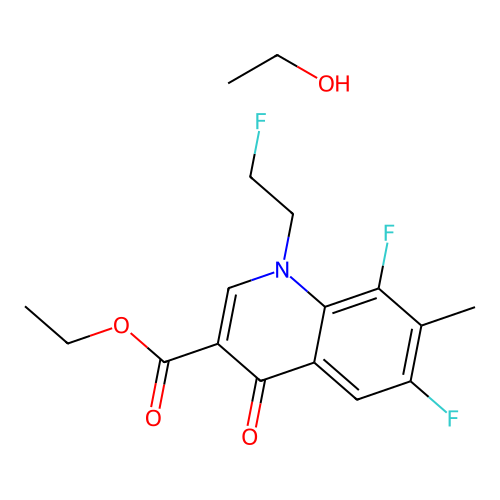

0 REAGENT
No compound
0 PRODUCT
['Cc1c(F)cc2c(=O)c(C(=O)O)cn(CCF)c2c1F']


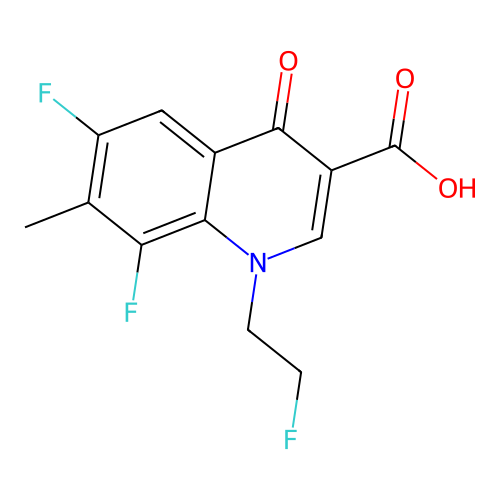

1 REACTANT
['CCOC(=O)CCNc1c(F)c(N)c2c(=O)c(C(=O)O)cn(C3CC3)c2c1OC', '[C-]#N']


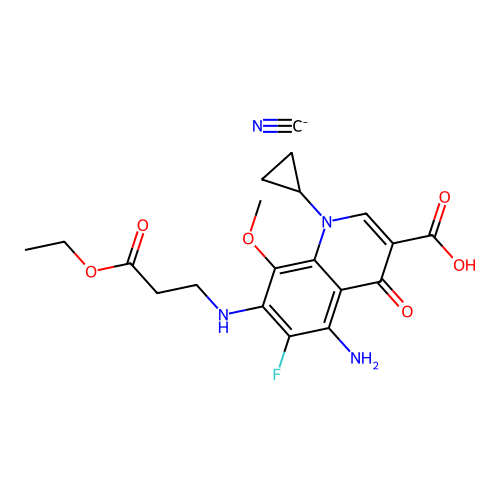

1 REAGENT
No compound
1 PRODUCT
['CCOC(=O)CCNc1c(F)c(N)c2c(=O)ccn(C3CC3)c2c1OC']


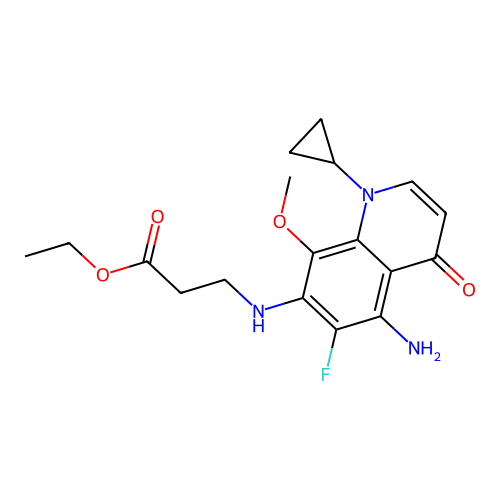

2 REACTANT
['CC#N', 'CCOC(=O)c1cn(C2CC2)c2c(F)c(Cl)c(F)c(Cl)c2c1=O', 'NCc1ccccc1', 'O=C([O-])[O-]']


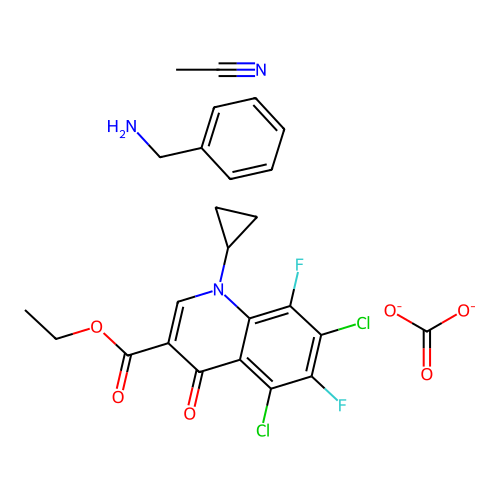

2 REAGENT
No compound
2 PRODUCT
['CCOC(=O)c1cn(C2CC2)c2c(F)c(Cl)c(F)cc2c1=O']


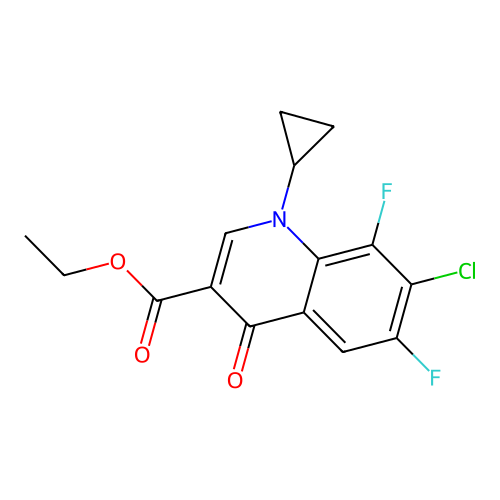

3 REACTANT
['CC1CCc2c(ccc(F)c2Cl)N1', 'CCOC=C(C(=O)OCC)C(=O)OCC']


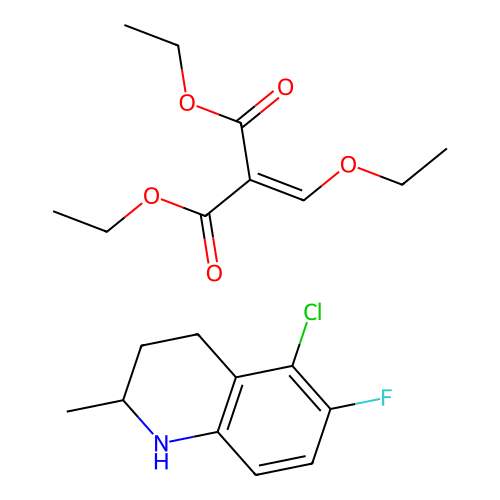

3 REAGENT
No compound
3 PRODUCT
['CC1CCc2c(Cl)c(F)cc3c(=O)c(C(=O)O)cn1c23']


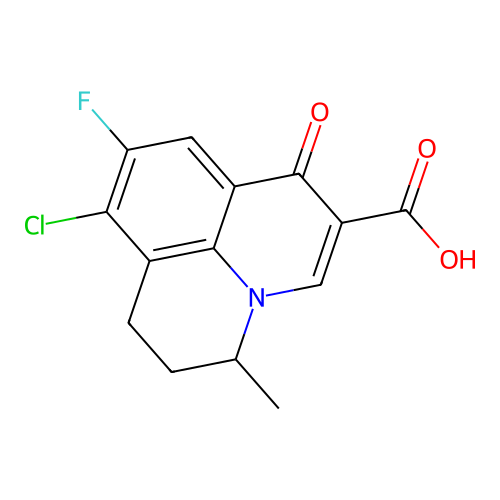

4 REACTANT
['O=C(O)c1cc(F)c(F)c(F)c1F', 'O=S(Cl)Cl']


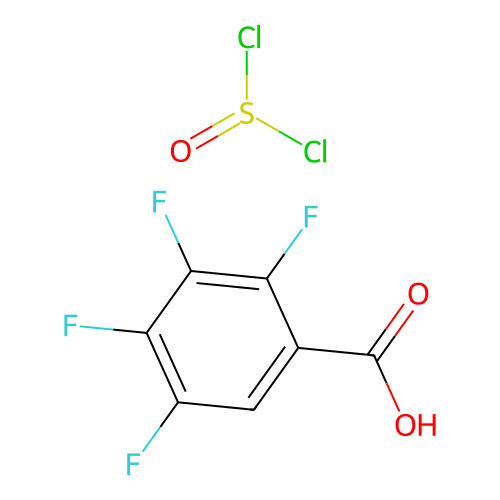

4 REAGENT
No compound
4 PRODUCT
['O=C(Cl)c1cc(F)c(F)c(F)c1F']


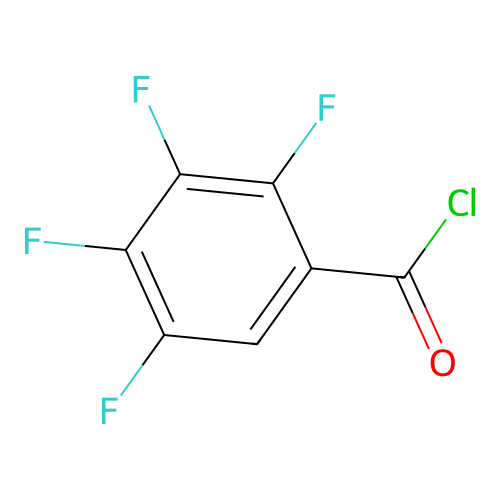

5 REACTANT
['C', 'CCCOc1cc2c(=O)cc(C(=O)OCC)n(CCC)c2ccc1=O']


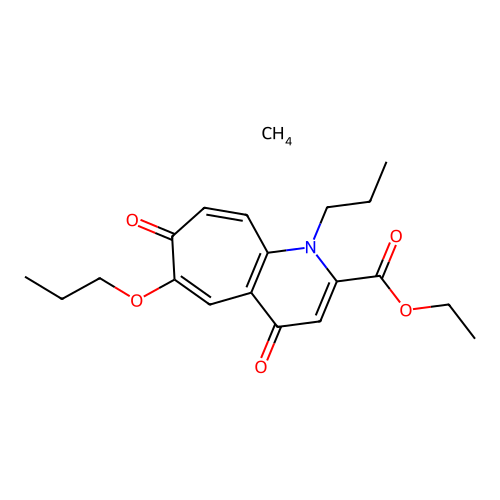

5 REAGENT
No compound
5 PRODUCT
['CCCOc1cc2c(=O)cc(C(=O)O)[nH]c2ccc1=O']


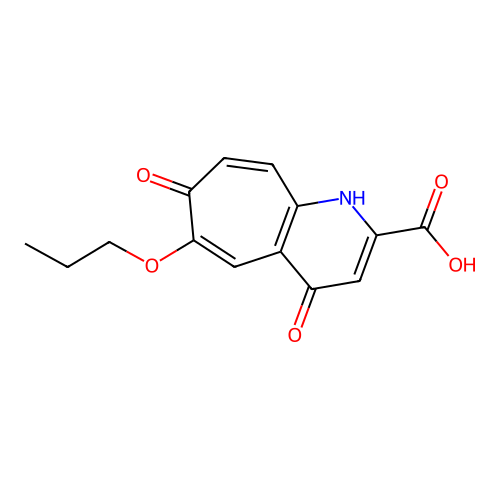

6 REACTANT
['CC(=O)CCl', 'CCN(CC)CC', 'O=C(O)c1cn(-c2ccc(F)cc2)c2c(F)c(N3CCNCC3)c(F)cc2c1=O']


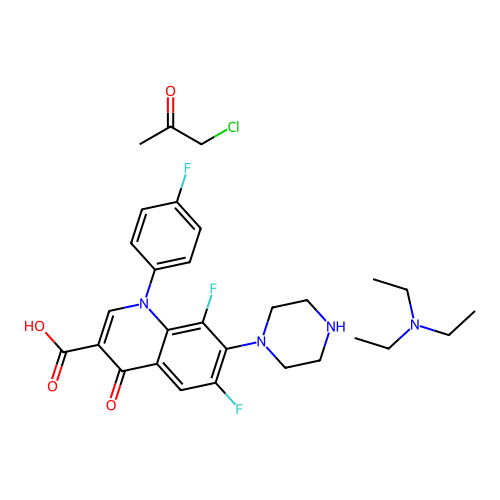

6 REAGENT
No compound
6 PRODUCT
['CC(=O)CN1CCN(c2c(F)cc3c(=O)c(C(=O)O)cn(-c4ccc(F)cc4)c3c2F)CC1']


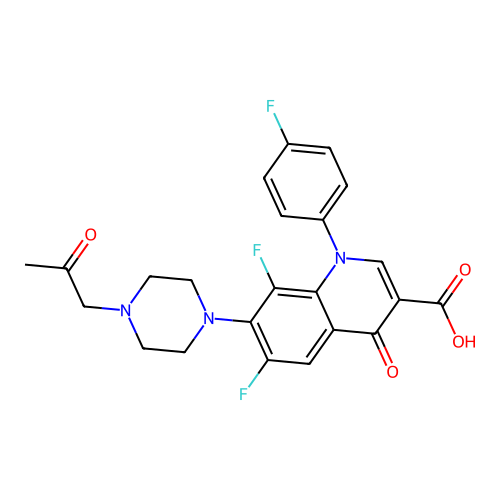

7 REACTANT
['CCN(CC)CC', 'COc1c(F)c(F)c(N)c2c(=O)c(C(=O)O)cn(Cc3ccccc3)c12', 'NCCNc1ccccn1']


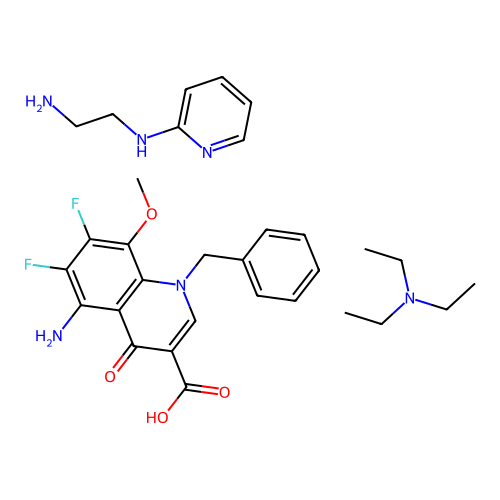

7 REAGENT
No compound
7 PRODUCT
['COc1c(NCCNc2ccccn2)c(F)c(N)c2c(=O)c(C(=O)O)cn(Cc3ccccc3)c12']


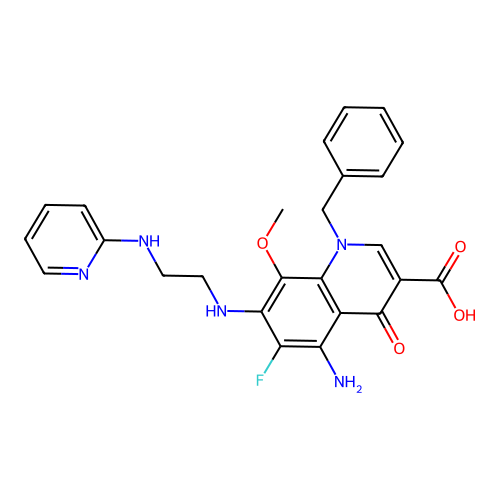

8 REACTANT
['CC1(N)CNC1', 'CCO', 'CN(C)C=O', 'CN1CCCC1', 'Nc1nc(-n2cc(C(=O)O)c(=O)c3cc(F)c(F)c(Cl)c32)c(F)cc1F']


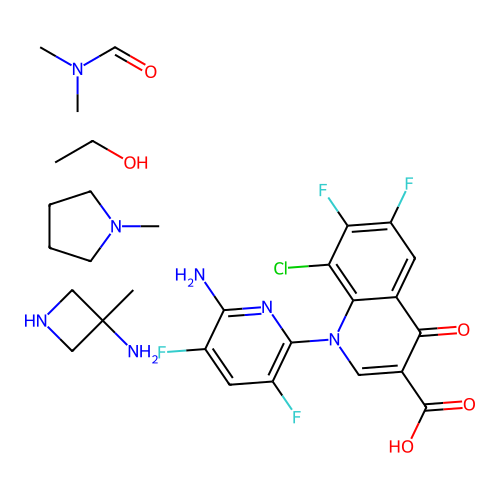

8 REAGENT
No compound
8 PRODUCT
['CC1(N)CN(c2c(F)cc3c(=O)c(C(=O)O)cn(-c4nc(N)c(F)cc4F)c3c2Cl)C1']


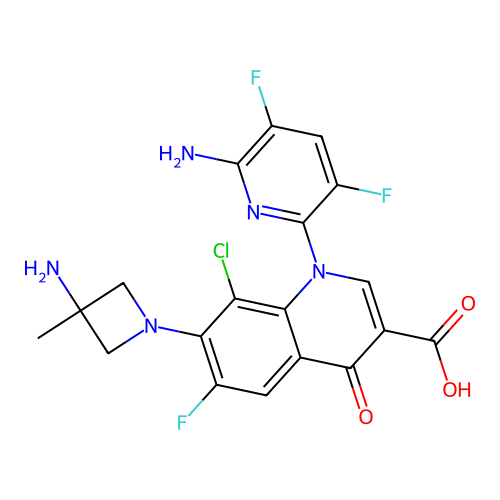

9 REACTANT
['CN1CCC(c2c[nH]c3ccc(N)nc23)CC1', 'O=C(Cl)c1c(F)c(F)c(F)c(F)c1F']


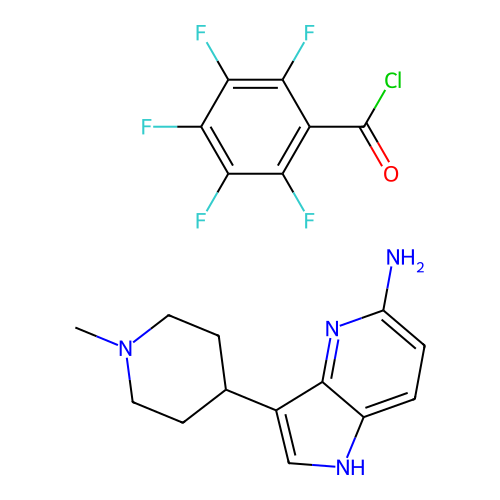

9 REAGENT
No compound
9 PRODUCT
['CN1CCC(c2c[nH]c3ccc(NC(=O)c4c(F)c(F)c(F)c(F)c4F)nc23)CC1']


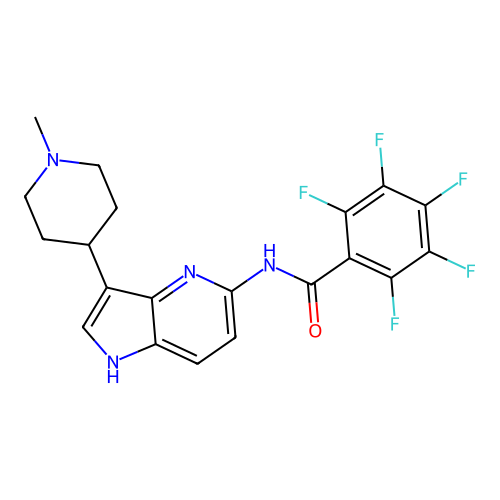

10 REACTANT
['C1CCC2=NCCCN2CC1', 'COc1c(F)c(F)cc2c(=O)c(C(=O)O)cn(C3CC3)c12', 'C[C@H]1CNC[C@H]1NC(=O)OC(C)(C)C']


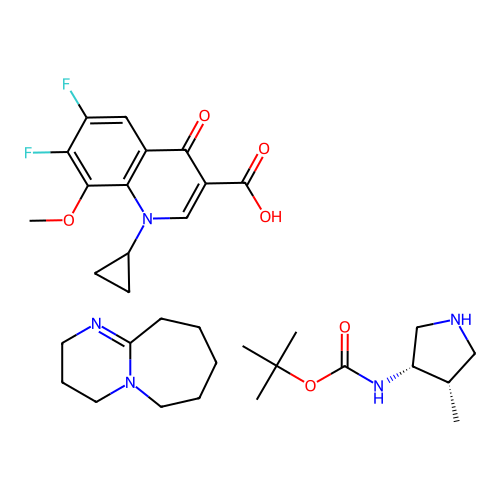

10 REAGENT
No compound
10 PRODUCT
['COc1c(N2C[C@@H](N)[C@@H](C)C2)c(F)cc2c(=O)c(C(=O)O)cn(C3CC3)c12']


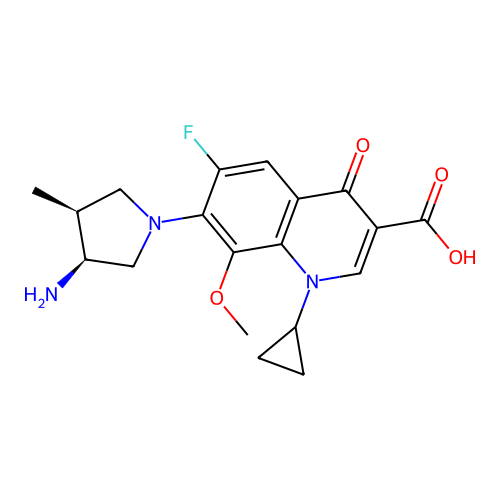

11 REACTANT
['CC1CNCCN1', 'O=C(O)c1cn(C2CC2)c2cc(F)c(F)c(NCc3ccccc3)c2c1=O', 'c1ccncc1']


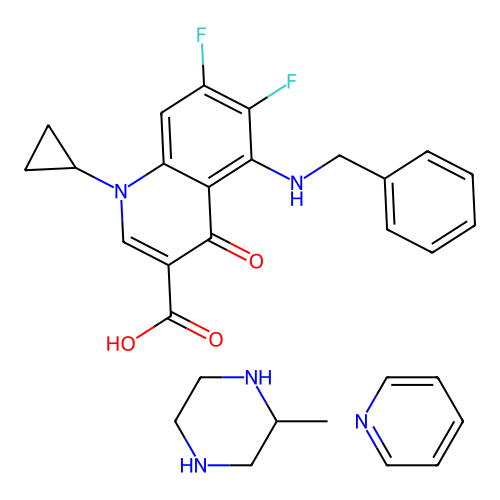

11 REAGENT
No compound
11 PRODUCT
['CC1CN(c2cc3c(c(NCc4ccccc4)c2F)c(=O)c(C(=O)O)cn3C2CC2)CCN1']


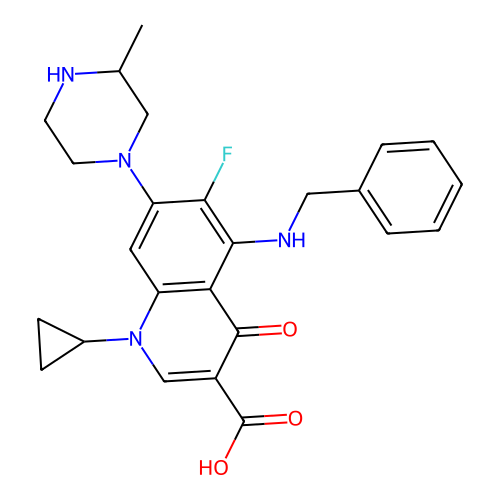

12 REACTANT
['CCOC(=O)c1cn(CC(F)(F)F)c2c(C)cc(F)cc2c1=O']


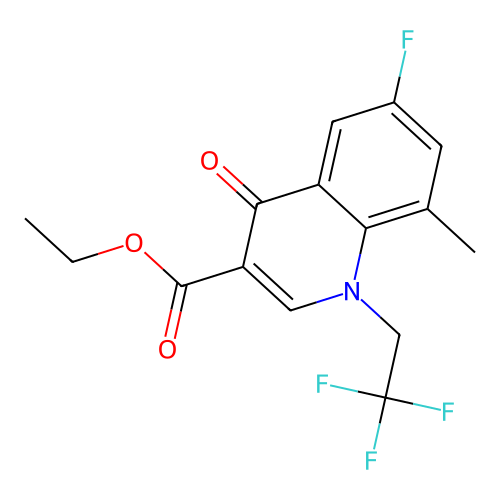

12 REAGENT
No compound
12 PRODUCT
['Cc1cc(F)cc2c(=O)c(C(=O)O)cn(CC(F)(F)F)c12']


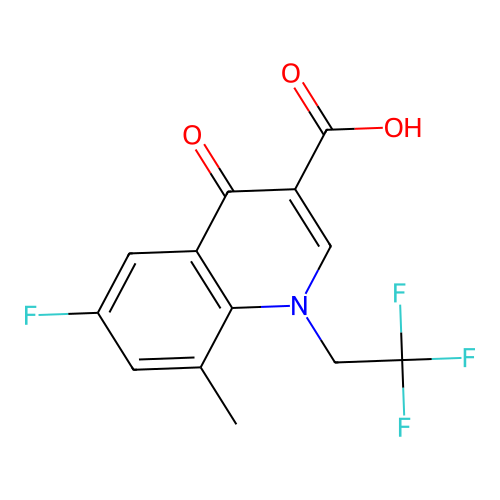

13 REACTANT
['CC(=O)O[BH-](OC(C)=O)OC(C)=O', 'CCN(C(C)C)C(C)C', 'ClCCl', 'NC1CCS(=O)(=O)C1', 'O=C(O)C(F)(F)F']


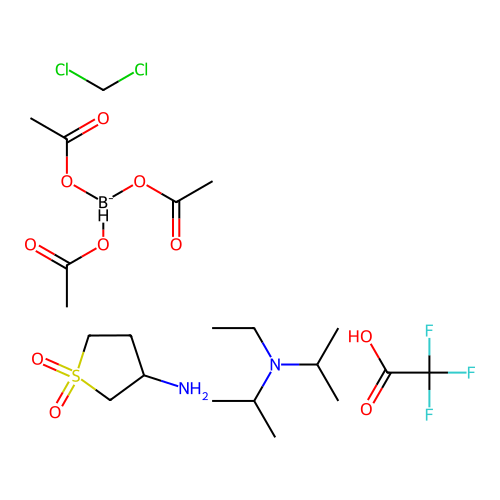

13 REAGENT
No compound
13 PRODUCT
['CC(C)n1c(=O)c(C(=O)O)cc2ccccc21']


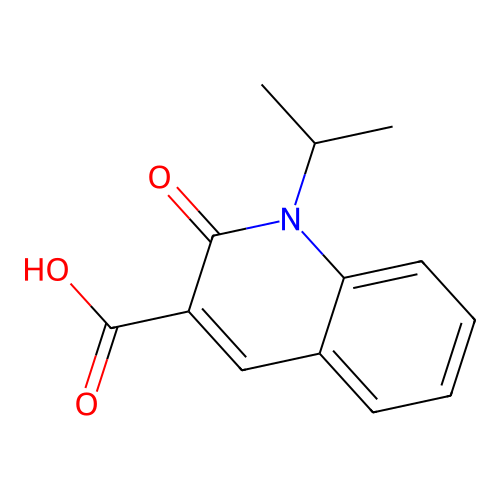

14 REACTANT
['CCOC(=O)Nc1cc(-n2cc(C(=O)OCC)c(=O)c3c(OCc4ccccc4)c(F)c(F)cc32)c(F)cc1F']


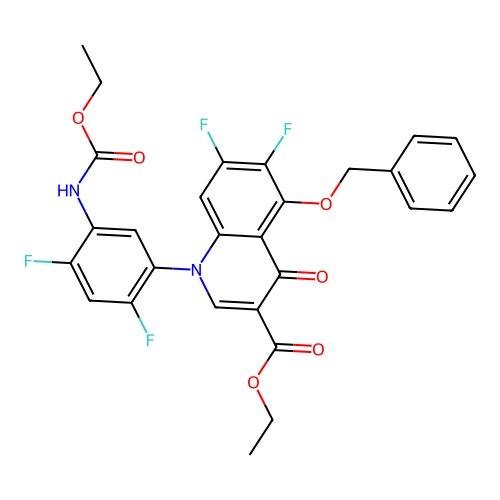

14 REAGENT
No compound
14 PRODUCT
['Nc1cc(-n2cc(C(=O)O)c(=O)c3c(O)c(F)c(F)cc32)c(F)cc1F']


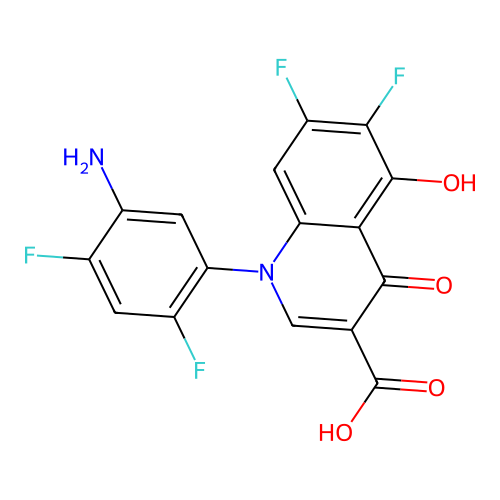

15 REACTANT
['CCN(CC)CC', 'NCCCc1ccccn1', 'Nc1c(F)c(F)c2c3c1c(=O)c(C(=O)O)cn3C1(CCOC1)CO2']


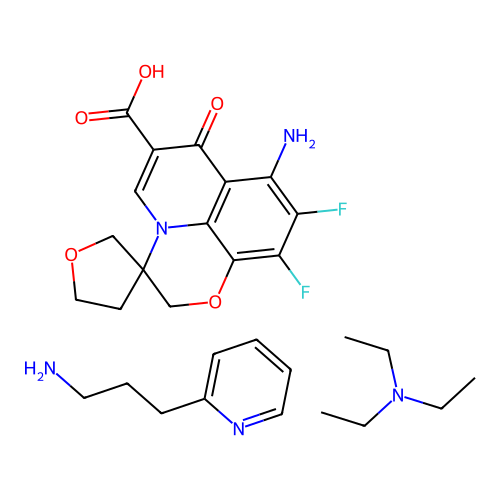

15 REAGENT
No compound
15 PRODUCT
['Nc1c(F)c(NCCCc2ccccn2)c2c3c1c(=O)c(C(=O)O)cn3C1(CCOC1)CO2']


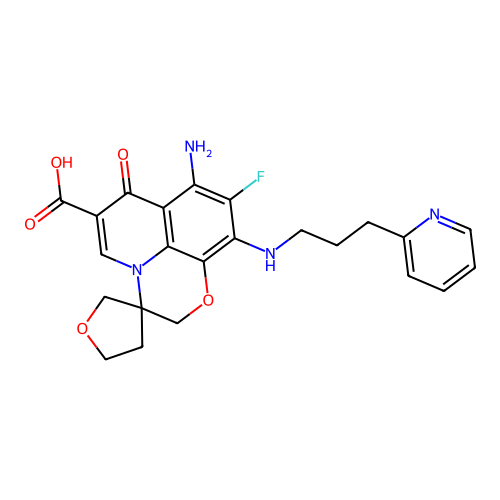

16 REACTANT
['CC(=O)OC(C)=O', 'CC1CCc2c(N)c(Cl)cc3c(=O)c(C(=O)O)cn1c23']


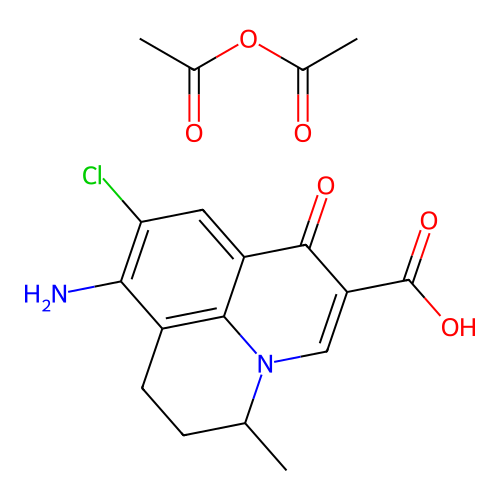

16 REAGENT
No compound
16 PRODUCT
['CC(=O)Nc1c(Cl)cc2c(=O)c(C(=O)O)cn3c2c1CCC3C']


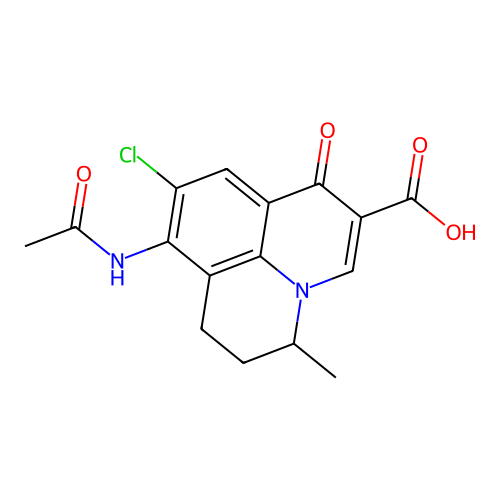

17 REACTANT
['Fc1c(F)c(F)c(SCc2ccccn2)c(F)c1F', 'O=C(OO)c1cccc(Cl)c1']


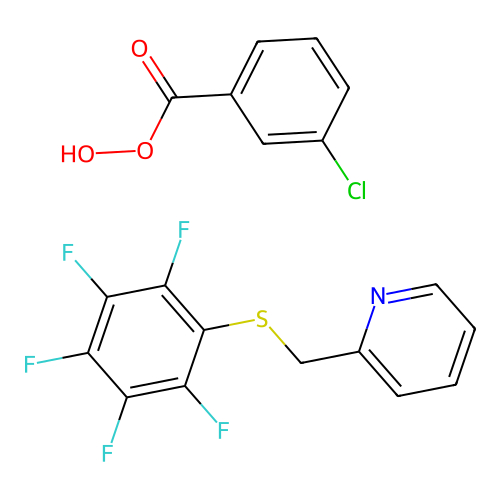

17 REAGENT
No compound
17 PRODUCT
['O=S(Cc1ccccn1)c1c(F)c(F)c(F)c(F)c1F']


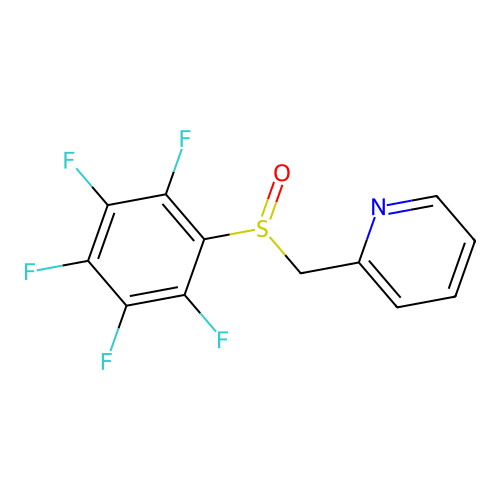

18 REACTANT
['CCN(CC)c1ccc2c(CN)cc(=O)oc2c1', 'O=C(Cl)c1c(F)c(F)c(F)c(F)c1F']


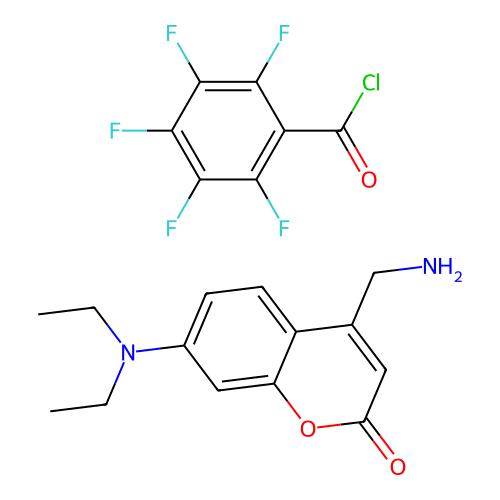

18 REAGENT
No compound
18 PRODUCT
['CCN(CC)c1ccc2c(CNC(=O)c3c(F)c(F)c(F)c(F)c3F)cc(=O)oc2c1']


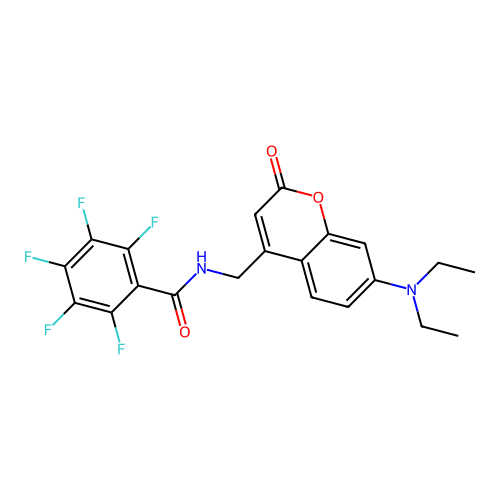

19 REACTANT
['CCOC(=O)c1cn(-c2c(F)cc(F)cc2F)c2c(Cl)c(F)c(F)cc2c1=O']


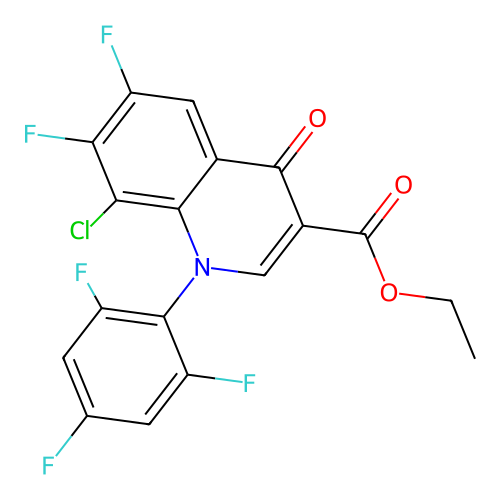

19 REAGENT
No compound
19 PRODUCT
['O=C(O)c1cn(-c2c(F)cc(F)cc2F)c2c(Cl)c(F)c(F)cc2c1=O']


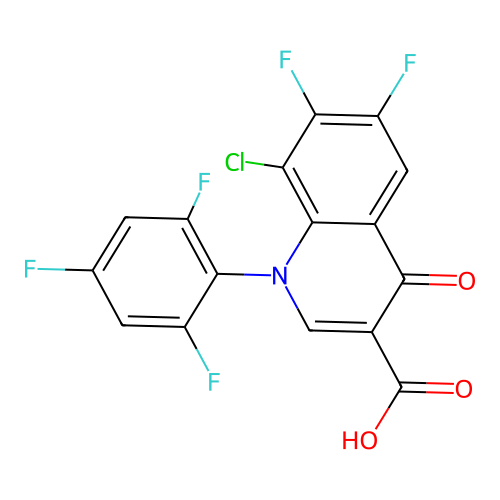

In [58]:
for idx in range(20):
    for col in ["REACTANT", "REAGENT", "PRODUCT"]:
        print(idx, col)
        # visualize the compounds with RDKit
        from rdkit import Chem
        from rdkit.Chem import Draw
        smiles = selected_df_target.iloc[idx][col]
        if smiles != " ":
            smiles = [i for i in smiles.split(".") if ("C" in i or "c" in i) and i != "Cl" and i != "[Cs+]" and i != "[Cl-]"]
            print(smiles)
            smiles = ".".join(smiles)
            mol = Chem.MolFromSmiles(smiles)
            img = Draw.MolToImage(mol, size=(500, 500), fitImage=True)
            display(img)
        else:
            print("No compound")
    

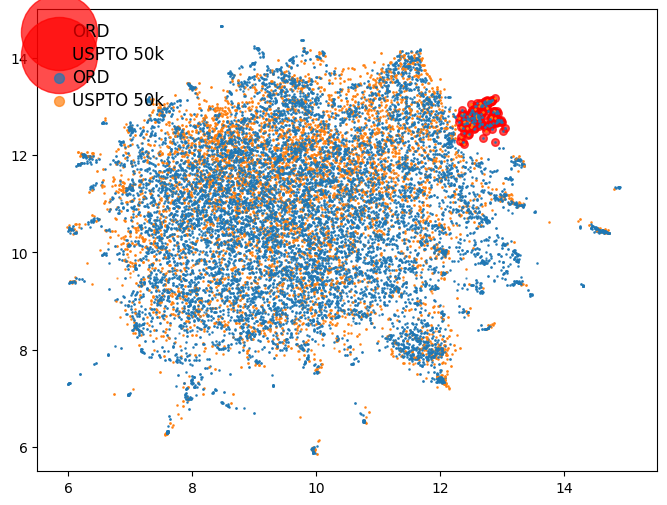

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
selected_target_embedding_umap = target_embedding_umap[(target_embedding_umap[:, 1] < 13.2) & (target_embedding_umap[:, 1] > 12.2) & (target_embedding_umap[:, 0] > 12.3)]
selected_df_target = df_target[(target_embedding_umap[:, 1] < 13.2) & (target_embedding_umap[:, 1] > 12.2) & (target_embedding_umap[:, 0] > 12.3)]
selected_query_embedding_umap = query_embedding_umap[(query_embedding_umap[:, 1] < 13.2) & (query_embedding_umap[:, 1] > 12.2) & (query_embedding_umap[:, 0] > 12.3)]
selected_df_query = df_query[(query_embedding_umap[:, 1] < 13.2) & (query_embedding_umap[:, 1] > 12.2) & (query_embedding_umap[:, 0] > 12.3)]
for i in range(0, 10000, 200):
    ax.scatter(selected_target_embedding_umap[i:i+500, 0], selected_target_embedding_umap[i:i+500, 1], alpha=0.7, s=30, label="ORD" if i == 0 else None, color="red")
    ax.scatter(selected_query_embedding_umap[i:i+500, 0], selected_query_embedding_umap[i:i+500, 1], alpha=0.7, s=30, label="USPTO 50k" if i == 0 else None, color="red")
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO 50k" if i == 0 else None, color="#ff7f0e")
# ax.scatter(selected_target_embedding_umap[10, 0], selected_target_embedding_umap[10, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="x")
# ax.scatter(selected_target_embedding_umap[30, 0], selected_target_embedding_umap[30, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="*")
# ax.scatter(selected_target_embedding_umap[20, 0], selected_target_embedding_umap[20, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="o")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
# ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
# ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)


0 REACTANT
['CCOC(=O)C=Cc1ccc(NC(=S)c2cc([Si](C)(C)C)cc([Si](C)(C)C)c2)cc1']


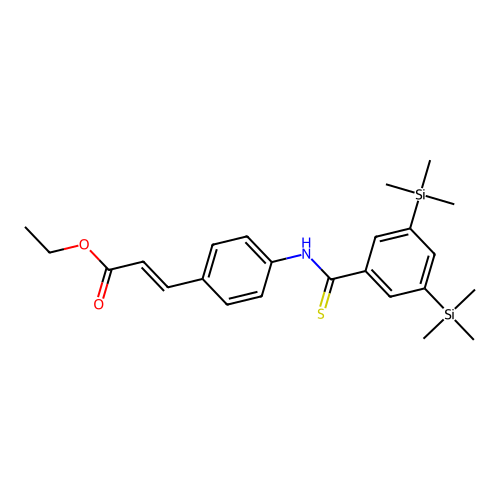

0 REAGENT
No compound
0 PRODUCT
['C[Si](C)(C)c1cc(C(=S)Nc2ccc(C=CC(=O)O)cc2)cc([Si](C)(C)C)c1']


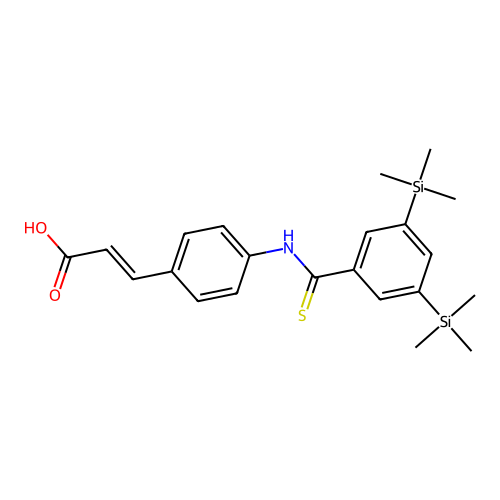

1 REACTANT
['CC(C)(C)[Si](C)(C)Cl', 'CCN(CC)CC', 'OCC1CCCNC1']


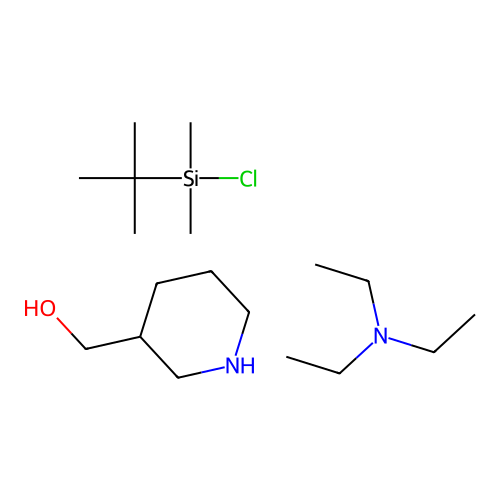

1 REAGENT
No compound
1 PRODUCT
['CC(C)(C)[Si](C)(C)OCC1CCCNC1']


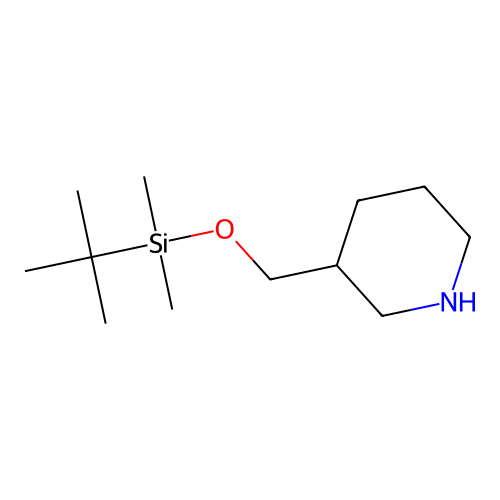

2 REACTANT
['CC(=O)Cl', 'COC(=O)CCCCCC(c1ccccc1)c1c(C)c(O[Si](c2ccccc2)(c2ccccc2)C(C)(C)C)c(C)c(C)c1O']


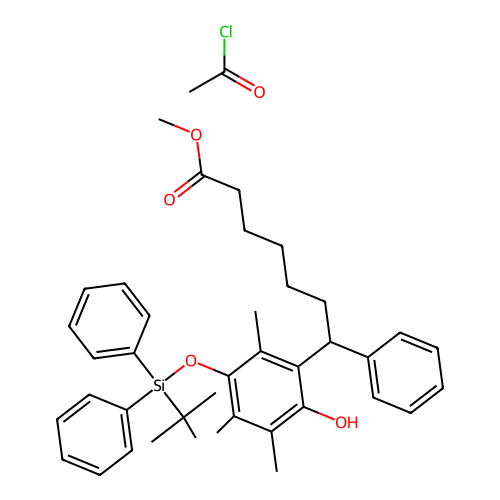

2 REAGENT
No compound
2 PRODUCT
['COC(=O)CCCCCC(c1ccccc1)c1c(C)c(O[Si](c2ccccc2)(c2ccccc2)C(C)(C)C)c(C)c(C)c1OC(C)=O']


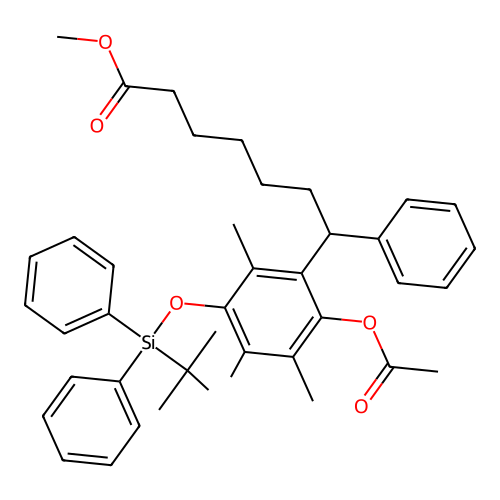

3 REACTANT
['CC(C)(C)[Si](OCCCNCc1ccccc1[N+](=O)[O-])(c1ccccc1)c1ccccc1', 'CCO']


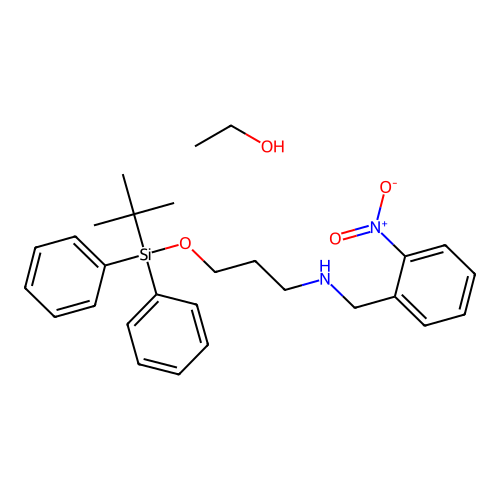

3 REAGENT
No compound
3 PRODUCT
['CC(C)(C)[Si](OCCCNCc1ccccc1N)(c1ccccc1)c1ccccc1']


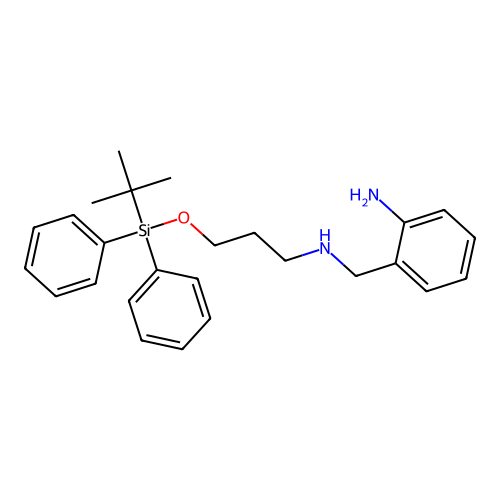

4 REACTANT
['C1=CCCCC1', 'C[SiH](Cl)Cl']


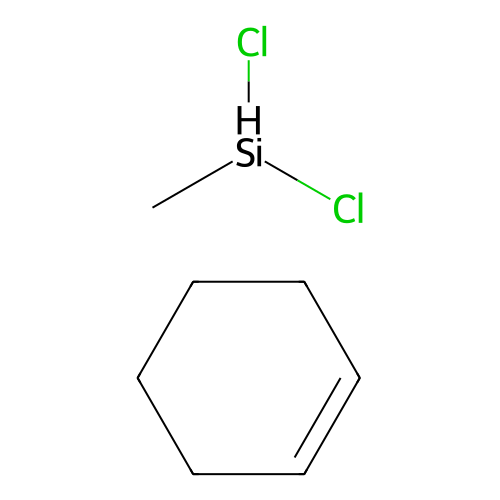

4 REAGENT
No compound
4 PRODUCT
['C[Si](Cl)(Cl)C1CCCCC1']


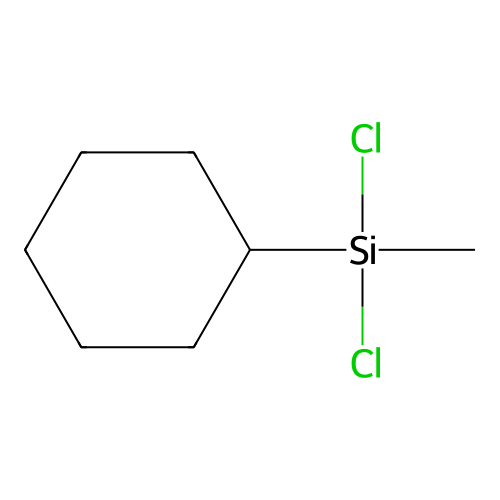

5 REACTANT
['CC(C)(C)[Si](C)(C)OCc1csc(N2CC(OS(C)(=O)=O)C2)n1', 'CC([O-])=S']


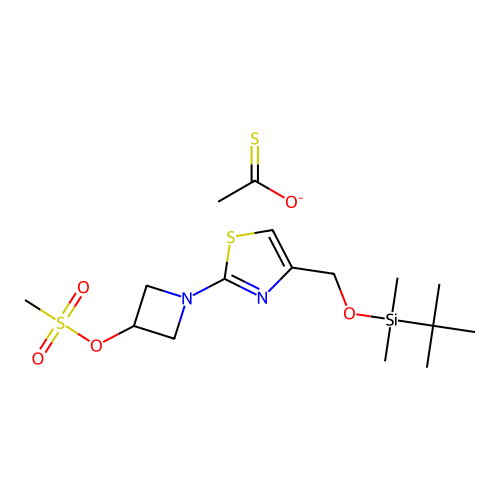

5 REAGENT
No compound
5 PRODUCT
['CC(=O)SC1CN(c2nc(CO[Si](C)(C)C(C)(C)C)cs2)C1']


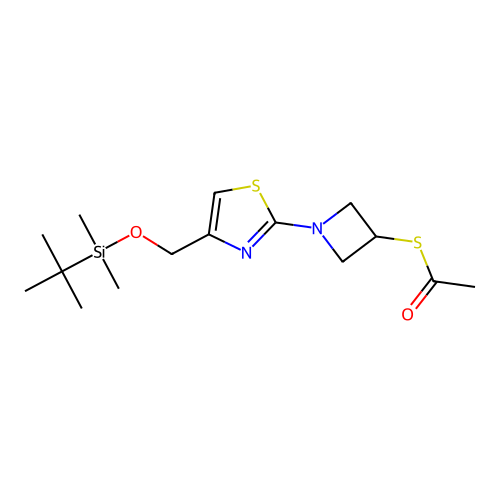

6 REACTANT
['CC(C)(C)[Si](Oc1cccc(C(=O)c2n[nH]c3ccccc23)c1)(c1ccccc1)c1ccccc1', 'CC(C)CI', 'CCCCCC', 'CCOC(C)=O']


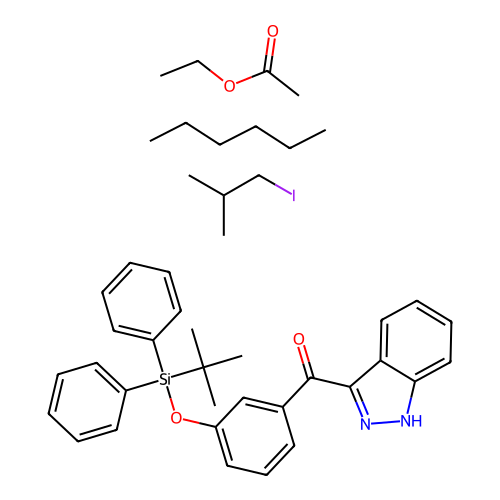

6 REAGENT
No compound
6 PRODUCT
['CC(C)Cn1nc(C(=O)c2cccc(O[Si](c3ccccc3)(c3ccccc3)C(C)(C)C)c2)c2ccccc21']


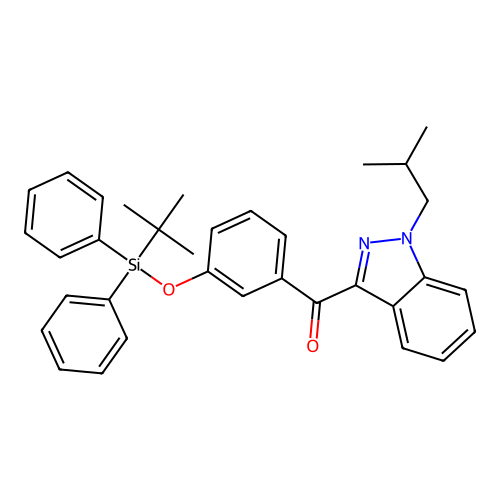

7 REACTANT
['CC(C)(C)[S@](N)=O', 'CC=O']


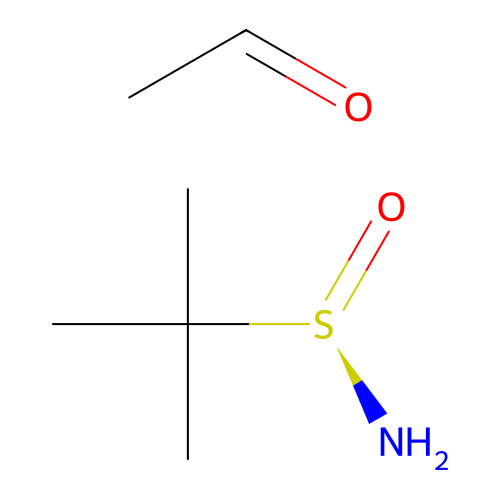

7 REAGENT
No compound
7 PRODUCT
['C/C=N/[S@](=O)C(C)(C)C']


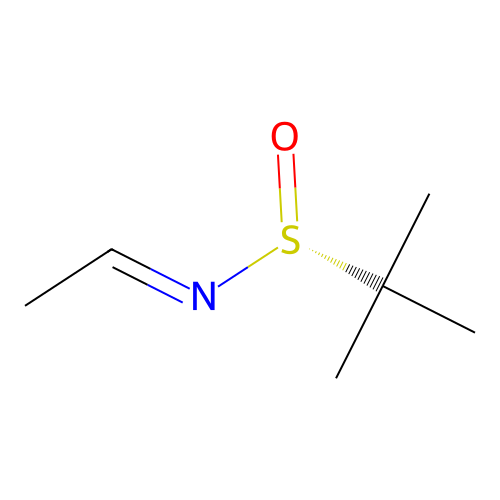

8 REACTANT
['C#CCC1(O)CCCCC1', 'C[SiH](C)Cl', 'c1c[nH]cn1']


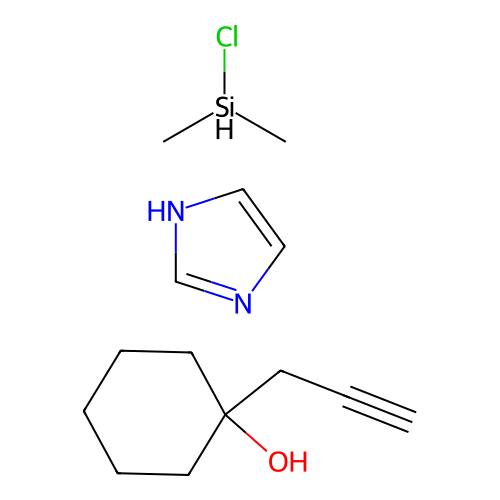

8 REAGENT
No compound
8 PRODUCT
['C#CCC1(O[Si](C)(C)C)CCCCC1']


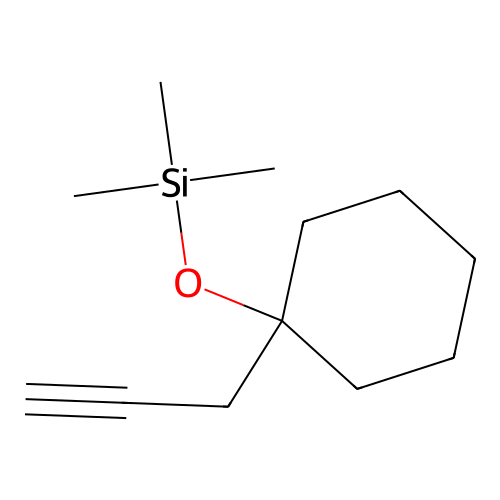

9 REACTANT
['CCc1cc(CO[Si](C)(C)C(C)(C)C)sc1C=O']


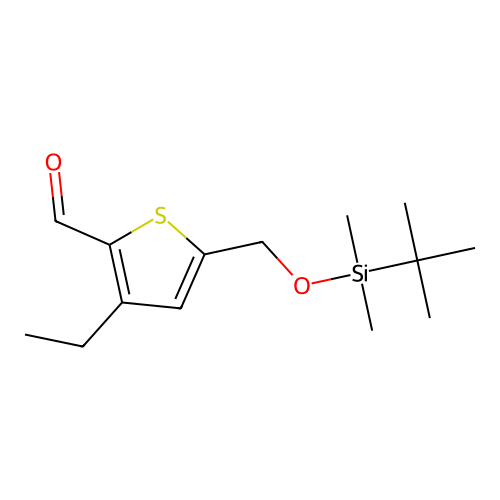

9 REAGENT
No compound
9 PRODUCT
['CCc1cc(CO[Si](C)(C)C(C)(C)C)sc1CO']


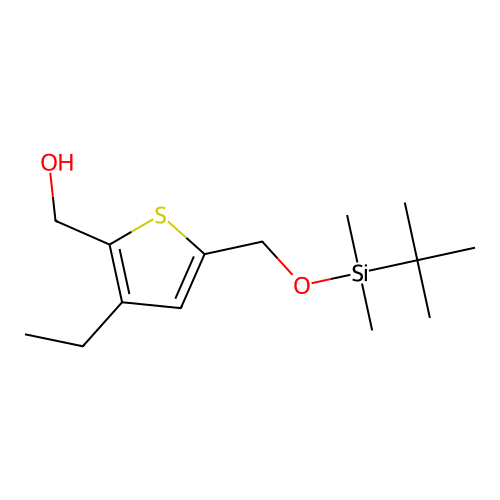

10 REACTANT
['COC/C=C/c1cc(CNC2CC2)cc(O[Si](C)(C)C(C)(C)C)c1']


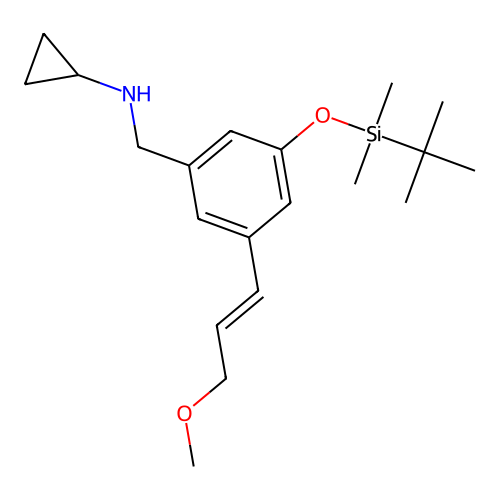

10 REAGENT
No compound
10 PRODUCT
['COCCCc1cc(CNC2CC2)cc(O[Si](C)(C)C(C)(C)C)c1']


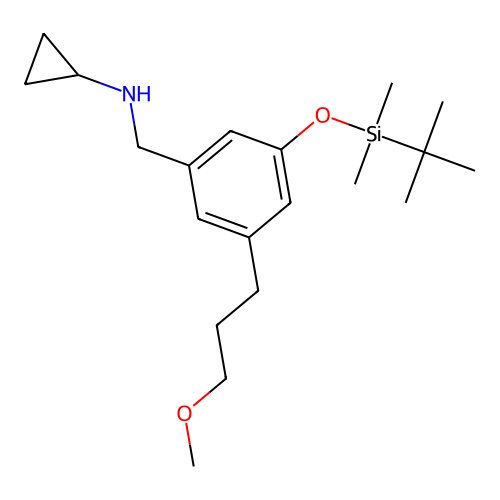

11 REACTANT
['CC(=O)O[BH-](OC(C)=O)OC(C)=O', 'CC(C)(C)[Si](C)(C)Oc1ccc(C2CCC(=O)CC2)c(O[Si](C)(C)C(C)(C)C)c1', 'C[N+](C)(C)C', 'NCc1ccccc1']


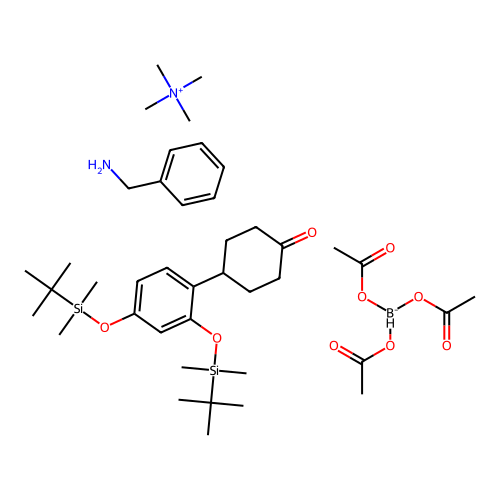

11 REAGENT
No compound
11 PRODUCT
['CC(C)(C)[Si](C)(C)Oc1ccc([C@H]2CC[C@@H](NCc3ccccc3)CC2)c(O[Si](C)(C)C(C)(C)C)c1']


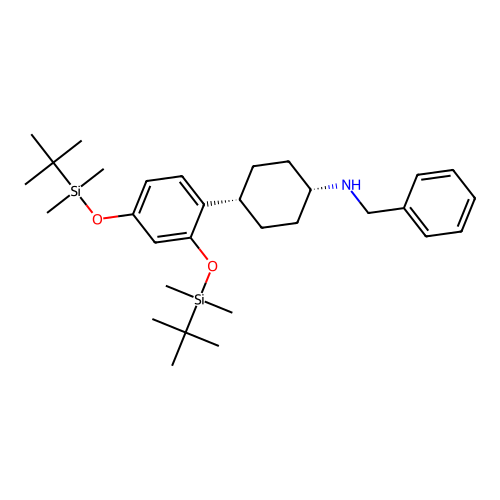

12 REACTANT
['CCNC(=O)c1c([Si](C)(C)C)sc2ccccc12', 'CSS(C)(=O)=O', '[Li]CCCC']


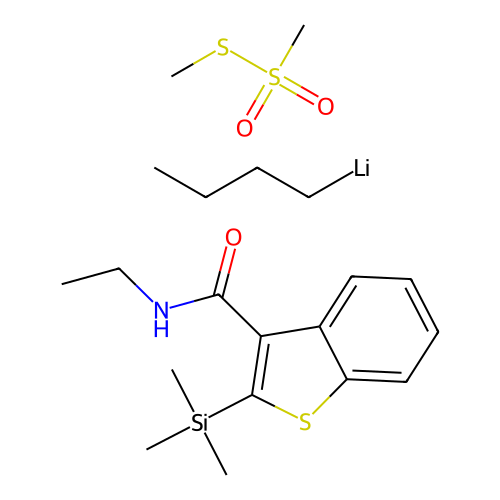

12 REAGENT
No compound
12 PRODUCT
['CCN(SC)C(=O)c1c([Si](C)(C)C)sc2ccccc12']


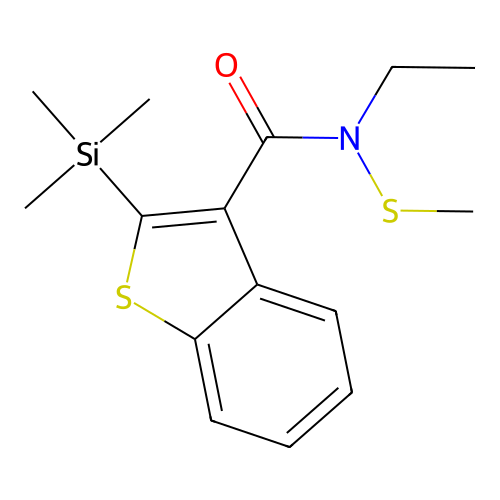

13 REACTANT
['CC(C)(C)[Si](C)(C)Cl', 'CCOC(C)=O', 'CN(C)C=O', 'OCc1cccc(Br)c1', 'c1c[nH]cn1']


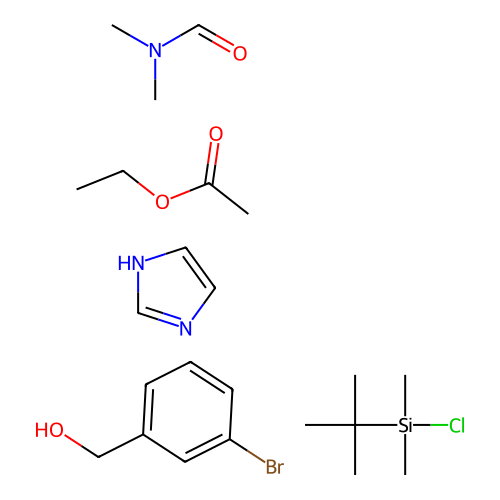

13 REAGENT
No compound
13 PRODUCT
['CC(C)(C)[Si](C)(C)OCc1cccc(Br)c1']


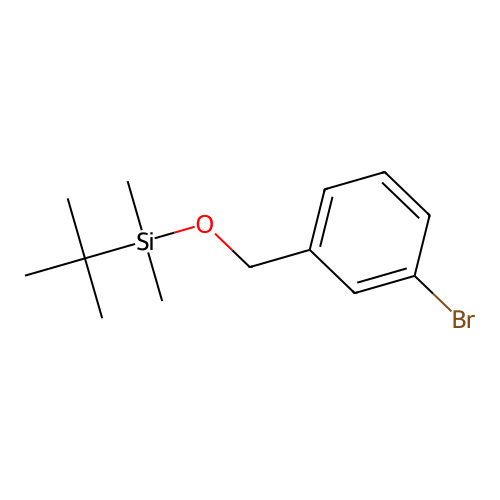

14 REACTANT
['C#Cc1ccc(C(=O)O)cc1', 'CCCC[SnH](CCCC)CCCC']


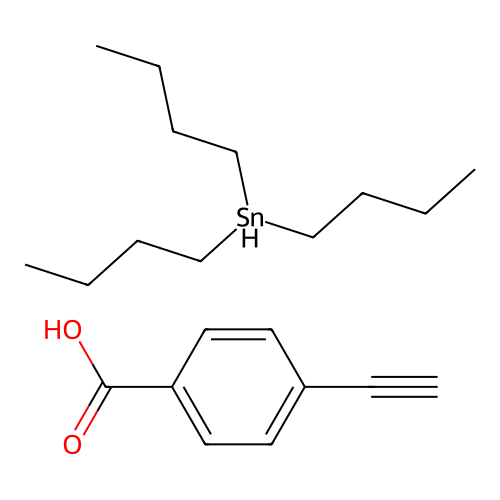

14 REAGENT
No compound
14 PRODUCT
['CCCC[Sn](C=Cc1ccc(C(=O)O[Sn](CCCC)(CCCC)CCCC)cc1)(CCCC)CCCC']


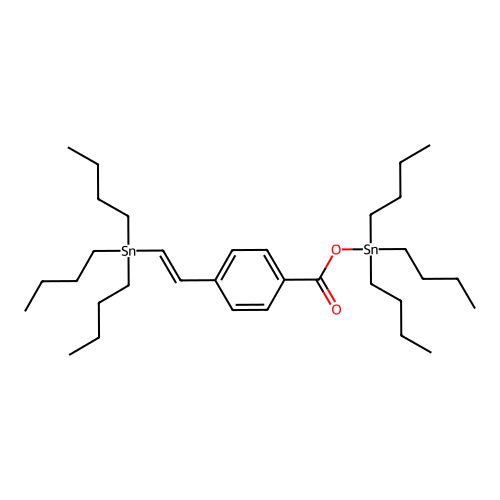

15 REACTANT
['C=CCCCCCCCCCCC=C', 'Cl[SiH](Cl)Cl']


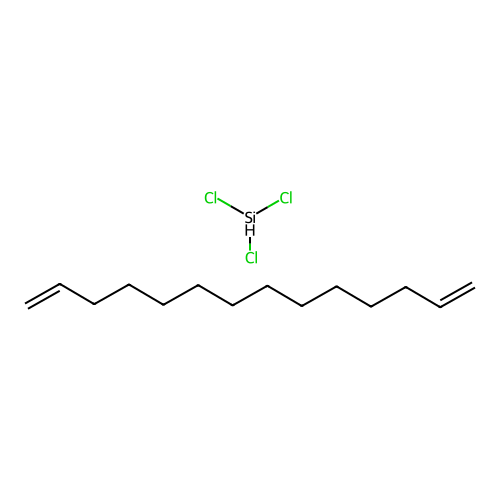

15 REAGENT
No compound
15 PRODUCT
['C=CCCCCCCCCCCCC[Si](Cl)(Cl)Cl']


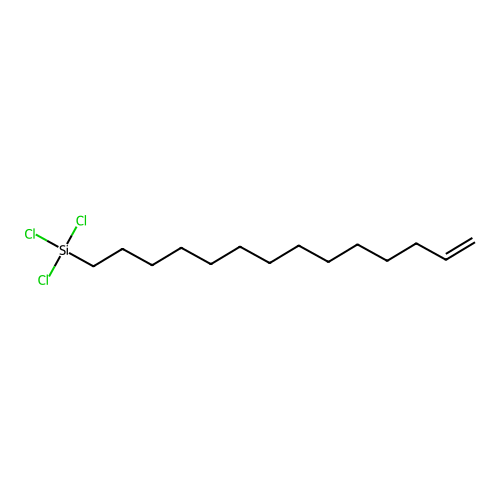

16 REACTANT
['C[Si](C)(Cl)C1=Cc2ccccc2C1', '[Li]C1([Si](C)(C)C)C=CC=C1']


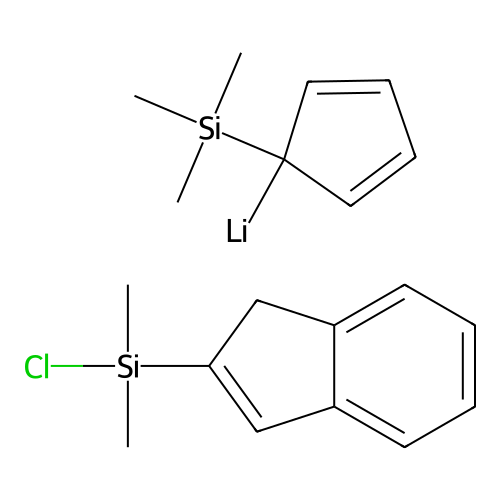

16 REAGENT
No compound
16 PRODUCT
['C[Si](C)(C)C[Si](C)(C1=Cc2ccccc2C1)C1C=CC=C1']


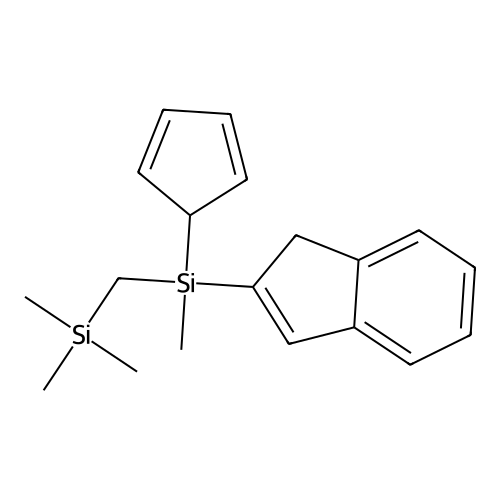

17 REACTANT
['CC(C)(C)[Si](C)(C)Cl', 'O=Cc1ccc2cccc(O)c2n1', 'c1c[nH]cn1']


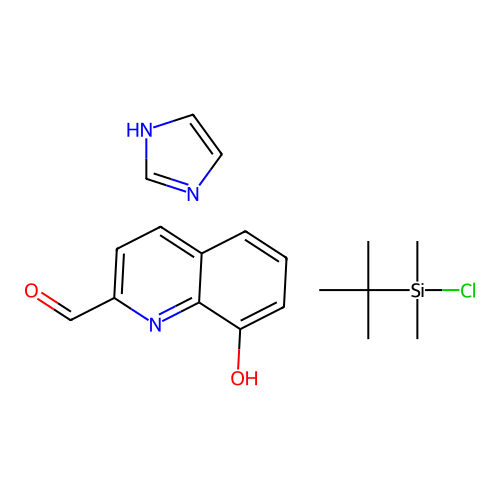

17 REAGENT
No compound
17 PRODUCT
['CC(C)(C)[Si](C)(C)Oc1cccc2ccc(C=O)nc12']


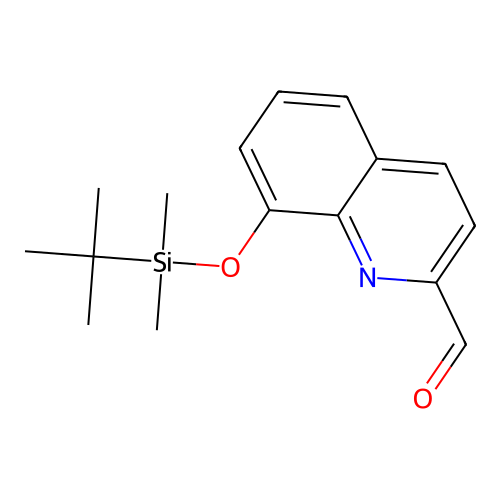

18 REACTANT
['C=CC(=O)Cc1ccc(F)cc1', 'CC(C)(C)[O-]', 'CC(C)(C)[Si](C)(C)Cl']


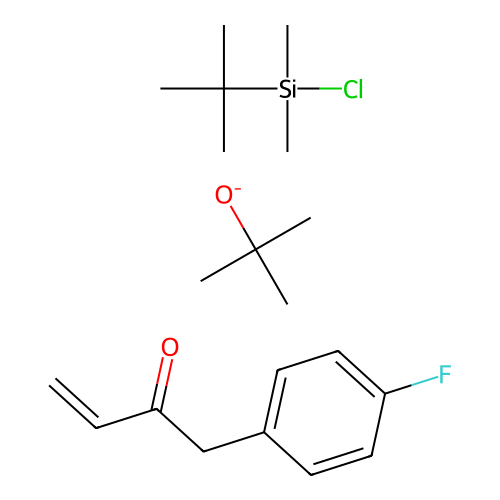

18 REAGENT
No compound
18 PRODUCT
['C=CC(=Cc1ccc(F)cc1)O[Si](C)(C)C(C)(C)C']


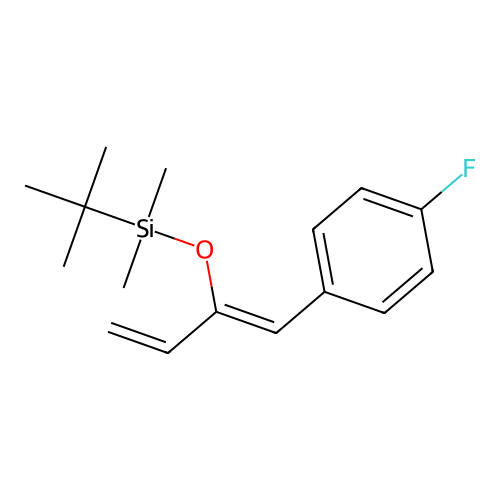

19 REACTANT
['Brc1ccco1', 'C#C[Si](C)(C)C', 'C1CCOC1', 'CC(C)NC(C)C']


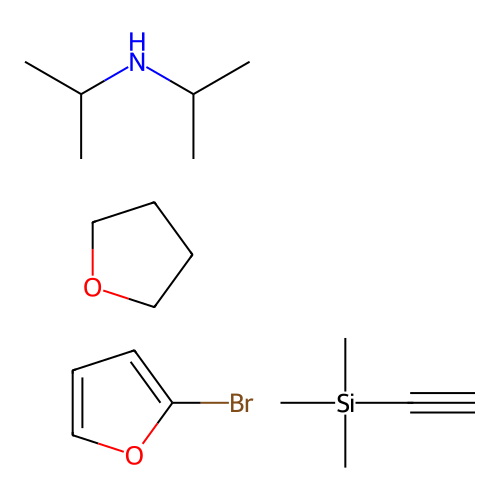

19 REAGENT
No compound
19 PRODUCT
['C[Si](C)(C)C#Cc1ccco1']


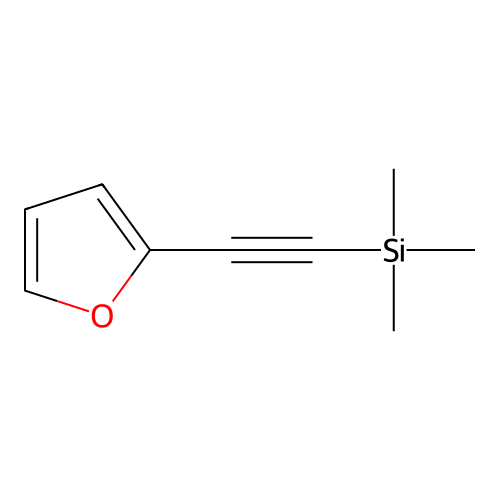

In [75]:
for idx in range(20):
    for col in ["REACTANT", "REAGENT", "PRODUCT"]:
        print(idx, col)
        # visualize the compounds with RDKit
        from rdkit import Chem
        from rdkit.Chem import Draw
        smiles = selected_df_target.iloc[idx][col]
        if smiles != " ":
            smiles = [i for i in smiles.split(".") if ("C" in i or "c" in i) and i != "Cl" and i != "[Cs+]" and i != "[Cl-]"]
            print(smiles)
            smiles = ".".join(smiles)
            mol = Chem.MolFromSmiles(smiles)
            img = Draw.MolToImage(mol, size=(500, 500), fitImage=True)
            display(img)
        else:
            print("No compound")
    

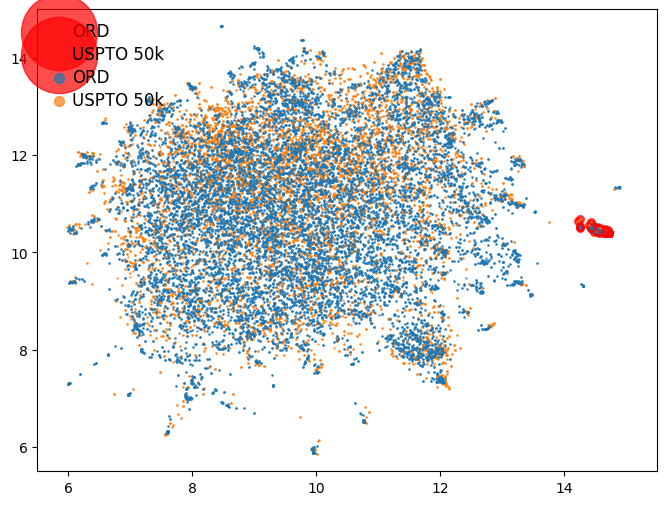

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
selected_target_embedding_umap = target_embedding_umap[(target_embedding_umap[:, 0] > 14) & (target_embedding_umap[:, 1] > 10) & (target_embedding_umap[:, 1] < 11)]
selected_df_target = df_target[(target_embedding_umap[:, 0] > 14) & (target_embedding_umap[:, 1] > 10) & (target_embedding_umap[:, 1] < 11)]
selected_query_embedding_umap = query_embedding_umap[(query_embedding_umap[:, 0] > 14) & (query_embedding_umap[:, 1] > 10) & (query_embedding_umap[:, 1] < 11)]
selected_df_query = df_query[(query_embedding_umap[:, 0] > 14) & (query_embedding_umap[:, 1] > 10) & (query_embedding_umap[:, 1] < 11)]
for i in range(0, 10000, 200):
    ax.scatter(selected_target_embedding_umap[i:i+500, 0], selected_target_embedding_umap[i:i+500, 1], alpha=0.7, s=30, label="ORD" if i == 0 else None, color="red")
    ax.scatter(selected_query_embedding_umap[i:i+500, 0], selected_query_embedding_umap[i:i+500, 1], alpha=0.7, s=30, label="USPTO 50k" if i == 0 else None, color="red")
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO 50k" if i == 0 else None, color="#ff7f0e")
ax.scatter(selected_target_embedding_umap[10, 0], selected_target_embedding_umap[10, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="x")
ax.scatter(selected_target_embedding_umap[30, 0], selected_target_embedding_umap[30, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="*")
ax.scatter(selected_target_embedding_umap[20, 0], selected_target_embedding_umap[20, 1], alpha=0.7, s=50, label="ORD" if i == 0 else None, color="red", marker="o")
# ax.set_xlabel("UMAP 1")
# ax.set_ylabel("UMAP 2")
# ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
# ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=10,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)


10 REACTANT
['CC(C)=O', 'CC(O)(CO)CCCC(CO)C1CCC2C3CC=C4CC(OC5CCCCO5)CC(OC5CCCCO5)C4(C)C3CCC12C', 'ClCCl']


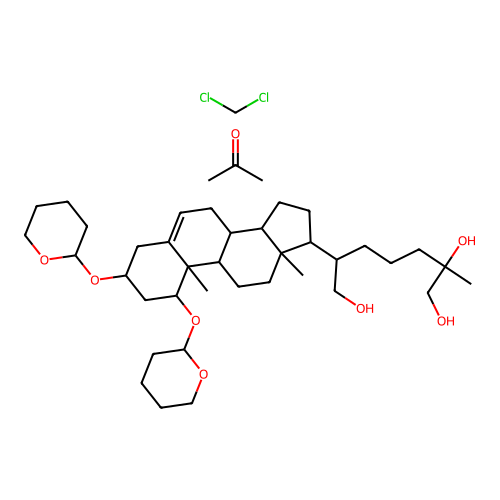

10 REAGENT
No compound
10 PRODUCT
['CC(O)(CO)CCCC(CI)C1CCC2C3CC=C4CC(OC5CCCCO5)CC(OC5CCCCO5)C4(C)C3CCC12C']


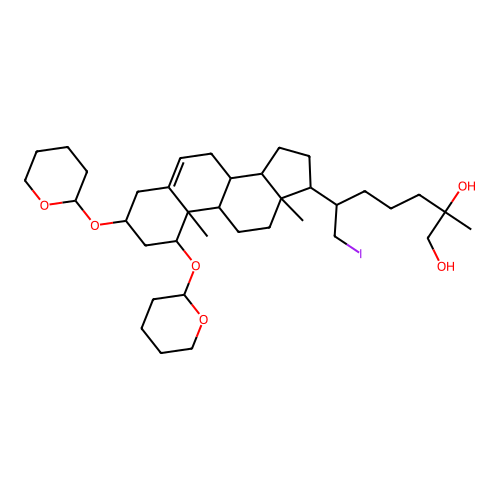

20 REACTANT
['CC(C)(C)OC(=O)NCCN', 'C[C@]12CC[C@H](OC(=O)n3ccnc3)CC1C(=O)C[C@@H]1[C@@H]2CC[C@]2(C)C(=O)CC[C@@H]12']


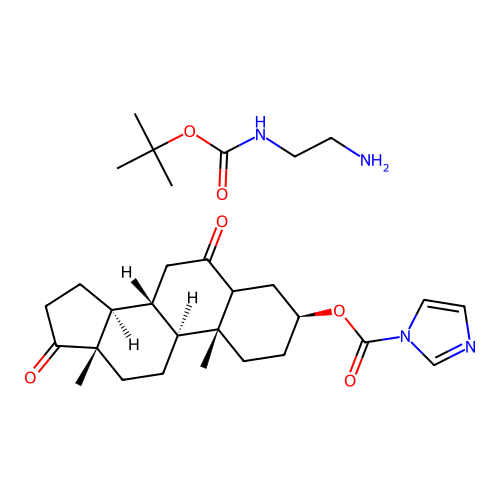

20 REAGENT
No compound
20 PRODUCT
['CC(C)(C)OC(=O)NCCNC(=O)O[C@H]1CC[C@@]2(C)C(C1)C(=O)C[C@@H]1[C@@H]2CC[C@]2(C)C(=O)CC[C@@H]12']


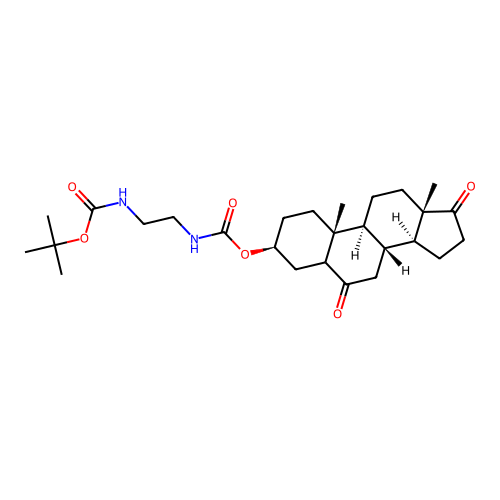

40 REACTANT
['C#C[Mg]Br', 'COC1=CC2=C[C@@H](C)[C@@H]3[C@H]([C@@H](F)C[C@]4(C)C(=O)CC[C@@H]34)[C@H]2CC1', '[Ce+3]']


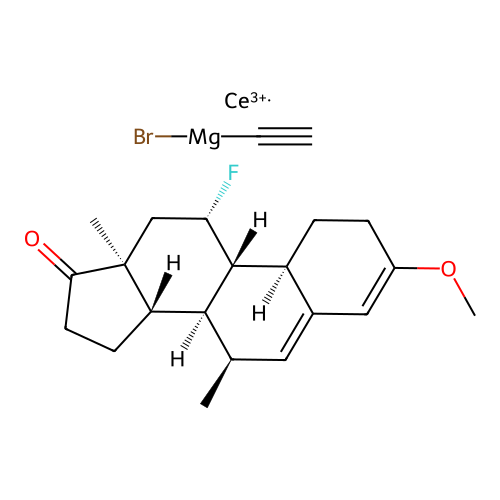

40 REAGENT
No compound
40 PRODUCT
['C#C[C@]1(O)CC[C@H]2[C@H]3[C@H]([C@@H](F)C[C@@]21C)[C@H]1CCC(=O)C=C1C[C@H]3C']


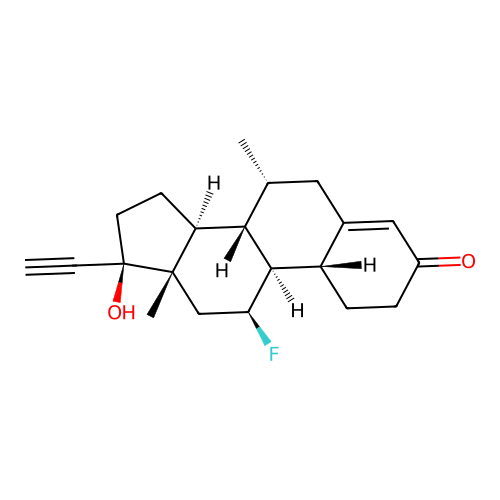

In [56]:
for idx in [10, 20, 40]:
    for col in ["REACTANT", "REAGENT", "PRODUCT"]:
        print(idx, col)
        # visualize the compounds with RDKit
        from rdkit import Chem
        from rdkit.Chem import Draw
        smiles = selected_df_target.iloc[idx][col]
        if smiles != " ":
            smiles = [i for i in smiles.split(".") if ("C" in i or "c" in i) and i != "Cl" and i != "[Cs+]" and i != "[Cl-]"]
            print(smiles)
            smiles = ".".join(smiles)
            mol = Chem.MolFromSmiles(smiles)
            img = Draw.MolToImage(mol, size=(500, 500), fitImage=True)
            display(img)
        else:
            print("No compound")

In [17]:
# calculate the molecular weight
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
from transformers import AutoTokenizer 
tokenizer = AutoTokenizer.from_pretrained("sagawa/ReactionT5v2-retrosynthesis")

for df in [df_target, df_query]:
    df["mol"] = df["input"].apply(Chem.MolFromSmiles)
    df["mw"] = df["mol"].apply(Descriptors.MolWt)
    df["logp"] = df["mol"].apply(Descriptors.MolLogP)
    df["hba"] = df["mol"].apply(Descriptors.NumHAcceptors)
    df["hbd"] = df["mol"].apply(Descriptors.NumHDonors)
    df["tpsa"] = df["mol"].apply(Descriptors.TPSA)
    df["rotb"] = df["mol"].apply(Descriptors.NumRotatableBonds)
    df["atoms"] = df["mol"].apply(Descriptors.HeavyAtomCount)
    df["rings"] = df["mol"].apply(Descriptors.RingCount)
    df["qed"] = df["mol"].apply(Descriptors.qed)
    df["input_len"] = df["input"].apply(lambda x: len(tokenizer(x)["input_ids"]))

/home/sagawa/miniconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [18]:
# for each feature, clip with 5% and 95% percentile
features = ["mw", "logp", "hba", "hbd", "tpsa", "rotb", "atoms", "rings", "qed", "input_len"]
for feature in features:
    lower = df_target[feature].quantile(0.05)
    upper = df_target[feature].quantile(0.95)
    df_target[feature] = df_target[feature].clip(lower, upper)
    lower = df_query[feature].quantile(0.05)
    upper = df_query[feature].quantile(0.95)
    df_query[feature] = df_query[feature].clip(lower, upper)

/tmp/ipykernel_1885513/3365050867.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1885513/3365050867.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


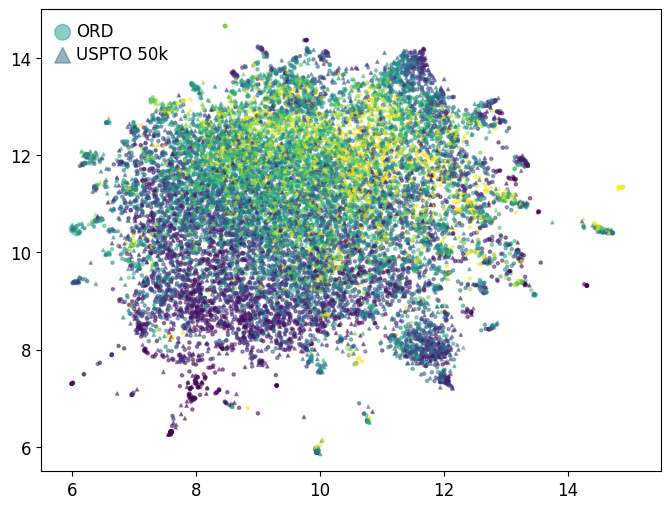

In [19]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["mw"])), marker="^")
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)

ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1885513/4053425805.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1885513/4053425805.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


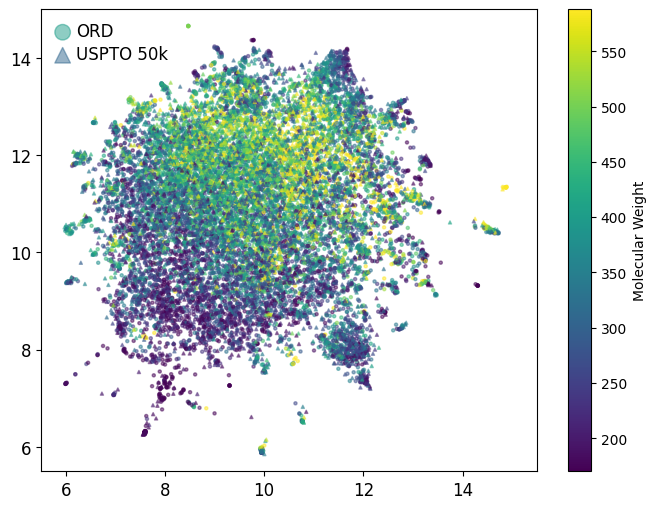

In [20]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["mw"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1869452/859262920.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1869452/859262920.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


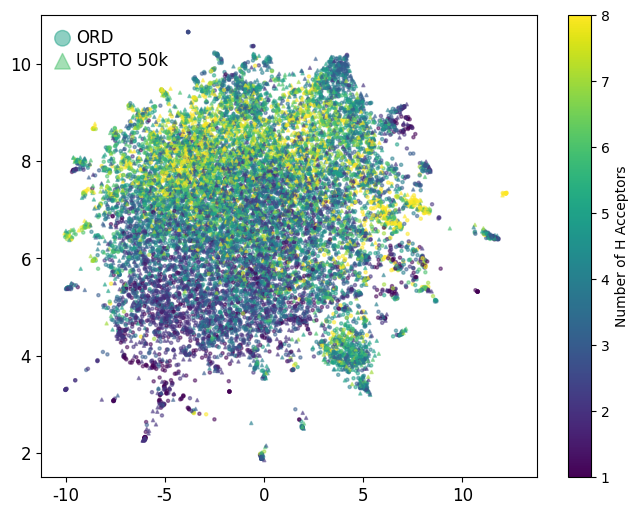

In [29]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["hba"].min(), df_query["hba"].min()), max(df_target["hba"].max(), df_query["hba"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["hba"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["hba"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of H Acceptors")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1869452/973789571.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1869452/973789571.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


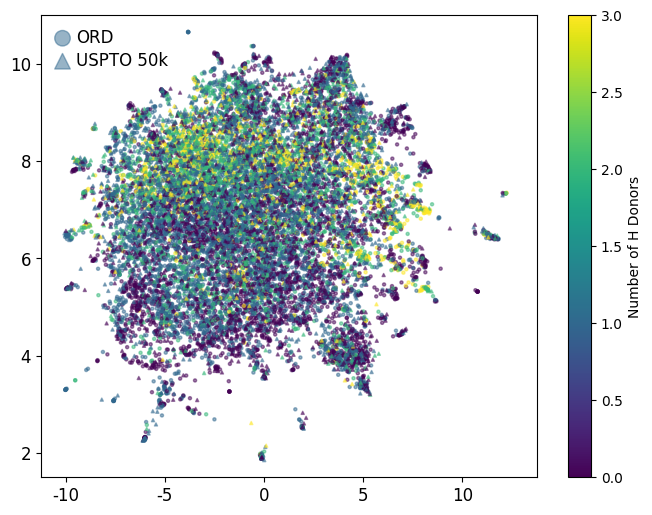

In [30]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["hbd"].min(), df_query["hbd"].min()), max(df_target["hbd"].max(), df_query["hbd"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["hbd"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["hbd"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of H Donors")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1869452/709456147.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1869452/709456147.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


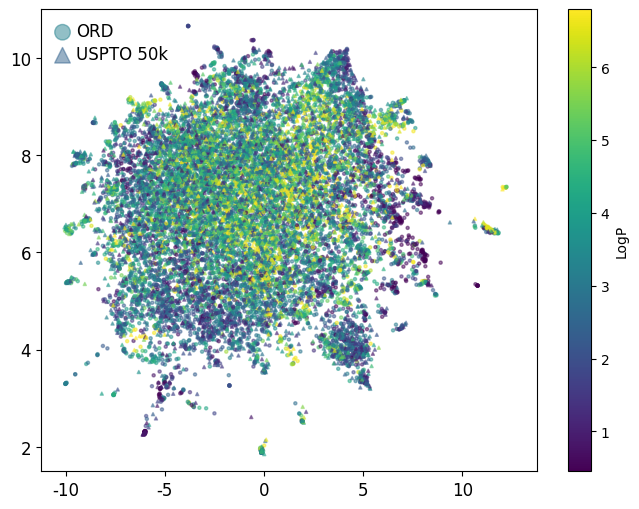

In [31]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["logp"].min(), df_query["logp"].min()), max(df_target["logp"].max(), df_query["logp"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["logp"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["logp"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="LogP")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1869452/2281100932.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1869452/2281100932.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


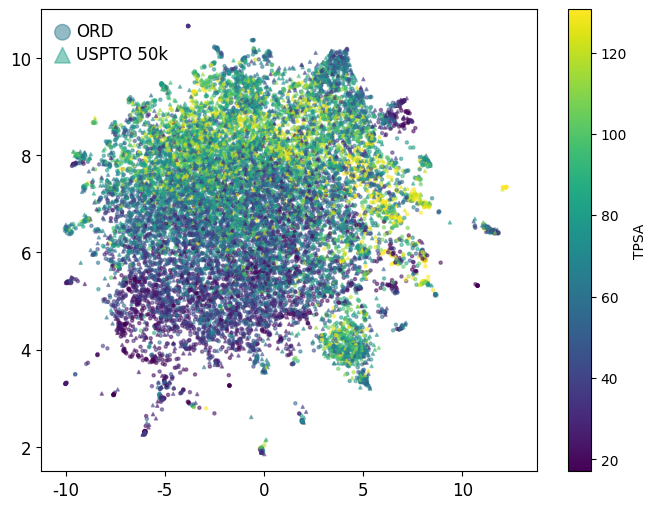

In [32]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["tpsa"].min(), df_query["tpsa"].min()), max(df_target["tpsa"].max(), df_query["tpsa"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["tpsa"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["tpsa"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="TPSA")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1869452/652211295.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1869452/652211295.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


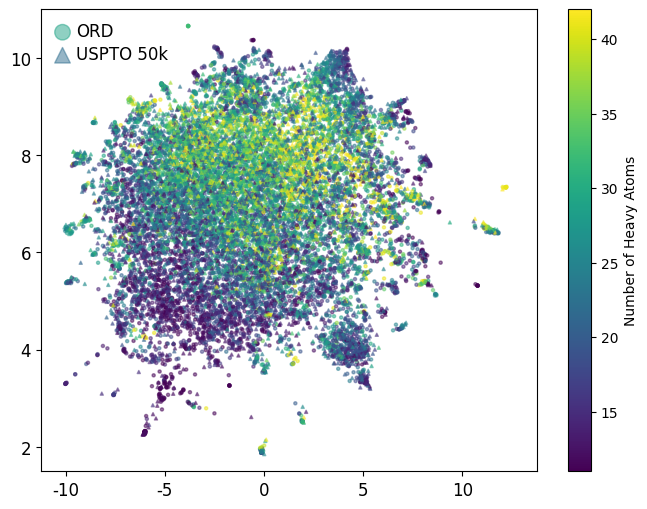

In [33]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["atoms"].min(), df_query["atoms"].min()), max(df_target["atoms"].max(), df_query["atoms"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["atoms"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["atoms"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of Heavy Atoms")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1869452/347308572.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1869452/347308572.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


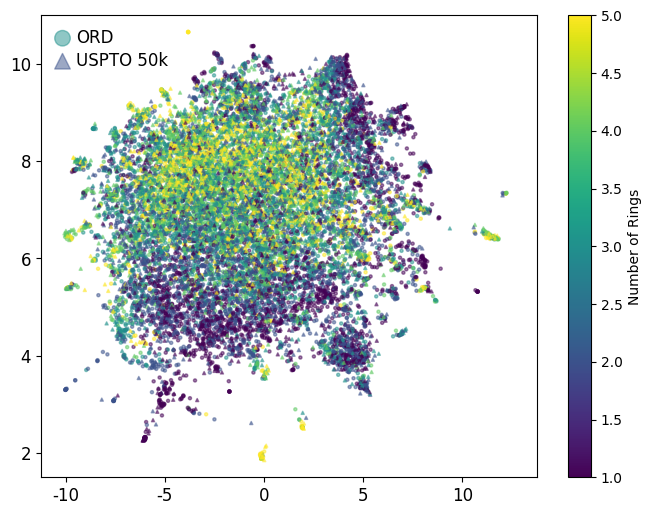

In [34]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["rings"].min(), df_query["rings"].min()), max(df_target["rings"].max(), df_query["rings"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["rings"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["rings"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Number of Rings")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

/tmp/ipykernel_1869452/2326274788.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_1869452/2326274788.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


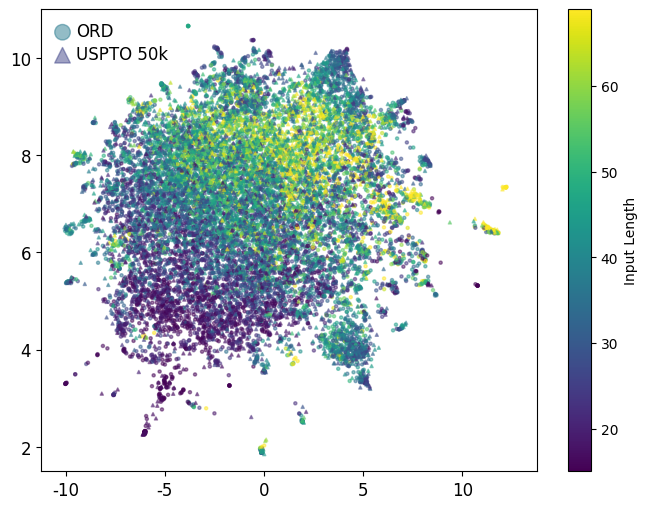

In [35]:
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["input_len"].min(), df_query["input_len"].min()), max(df_target["input_len"].max(), df_query["input_len"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["input_len"])), marker="o")
ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["input_len"])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Input Length")
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.set_xlim(5.5, 15.5)
ax.set_ylim(5.5, 15)
ax.legend(  
    loc='upper left',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)

# visualize distance

In [ ]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/distance.csv")
distance

REACTANT  \
0                  C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O   
1                    COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N   
2                  CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC   
3               Nc1ccc(O)cc1.O=[N+]([O-])c1ccc(Cl)nc1Cl   
4     [N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...   
...                                                 ...   
4999             Cc1cc([N+](=O)[O-])ccc1O.Nc1cc(Cl)ccn1   
5000  COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)OC(C)(C)C)CC3   
5001  COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(=...   
5002               C=C(C)Cn1nc(C)c(Br)c1-c1ccc(F)cc1.OO   
5003  COC(=O)c1cc(Br)c(F)c(F)c1Nc1ccccc1F.COc1ccc(CS...   

                                                PRODUCT CATALYST REAGENT  \
0                    COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O                    
1                    COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1                    
2                  CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1                    
3                  O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1                    
4     NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](=O)[O-...                    
...                                                 ...      ...     ...   
4999                Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1                    
5000          COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3                    
5001  COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...                    
5002                  Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br                    
5003    COC(=O)c1cc(SCc2ccc(OC)cc2)c(F)c(F)c1Nc1ccccc1F                    

     SOLVENT                                              input  distance  
0                            COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O  0.669855  
1                            COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1  0.723579  
2                          CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1  0.907065  
3                          O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1  0.791577  
4             NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](=O)[O-...  0.768288  
...      ...                                                ...       ...  
4999                        Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1  0.884089  
5000                  COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3  0.646120  
5001          COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...  0.830466  
5002                          Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br  0.692978  
5003            COC(=O)c1cc(SCc2ccc(OC)cc2)c(F)c(F)c1Nc1ccccc1F  0.908634  

[5004 rows x 7 columns]

/tmp/ipykernel_3436725/97392767.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


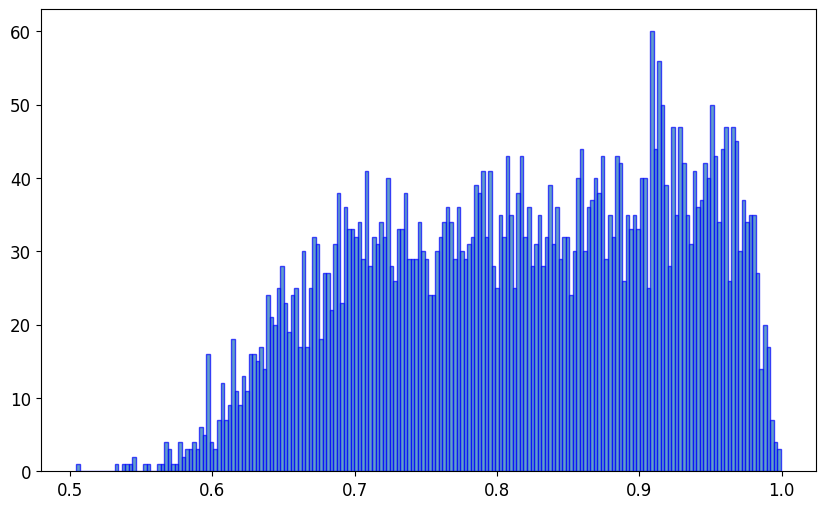

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

# visualize distance

In [43]:
distance = pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/distance.csv")
distance

REACTANT  \
0                  C1=COCCC1.COC(=O)CCC(=O)c1ccc(O)cc1O   
1                    COC(=O)c1cccc(C(=O)O)c1.Nc1cccnc1N   
2                  CC(C)(C)OC(=O)NC1CCC(C(=O)O)CC1.CNOC   
3               Nc1ccc(O)cc1.O=[N+]([O-])c1ccc(Cl)nc1Cl   
4     [N-]=[N+]=NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([...   
...                                                 ...   
4999             Cc1cc([N+](=O)[O-])ccc1O.Nc1cc(Cl)ccn1   
5000  COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)OC(C)(C)C)CC3   
5001  COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(=...   
5002               C=C(C)Cn1nc(C)c(Br)c1-c1ccc(F)cc1.OO   
5003  COC(=O)c1cc(Br)c(F)c(F)c1Nc1ccccc1F.COc1ccc(CS...   

                                                PRODUCT CATALYST REAGENT  \
0                    COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O                    
1                    COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1                    
2                  CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1                    
3                  O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1                    
4     NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](=O)[O-...                    
...                                                 ...      ...     ...   
4999                Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1                    
5000          COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3                    
5001  COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...                    
5002                  Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br                    
5003    COC(=O)c1cc(SCc2ccc(OC)cc2)c(F)c(F)c1Nc1ccccc1F                    

     SOLVENT                                              input  distance  
0                            COC(=O)CCC(=O)c1ccc(OC2CCCCO2)cc1O  0.669855  
1                            COC(=O)c1cccc(-c2nc3cccnc3[nH]2)c1  0.723579  
2                          CON(C)C(=O)C1CCC(NC(=O)OC(C)(C)C)CC1  0.907065  
3                          O=[N+]([O-])c1ccc(Cl)nc1Nc1ccc(O)cc1  0.791577  
4             NCC1=CC[C@@H](c2ccc(Cl)cc2Cl)[C@H]([N+](=O)[O-...  0.768288  
...      ...                                                ...       ...  
4999                        Cc1cc([N+](=O)[O-])ccc1Oc1ccnc(N)c1  0.884089  
5000                  COC(=O)c1[nH]c2cc(Cl)cc3c2c1C(CC(=O)O)CC3  0.646120  
5001          COc1cc(C(F)(F)F)cc(SC)c1C(=O)NC1(c2ccccc2)CC(O...  0.830466  
5002                          Cc1nn(CC(C)CO)c(-c2ccc(F)cc2)c1Br  0.692978  
5003            COC(=O)c1cc(SCc2ccc(OC)cc2)c(F)c(F)c1Nc1ccccc1F  0.908634  

[5004 rows x 7 columns]

/tmp/ipykernel_3436725/97392767.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


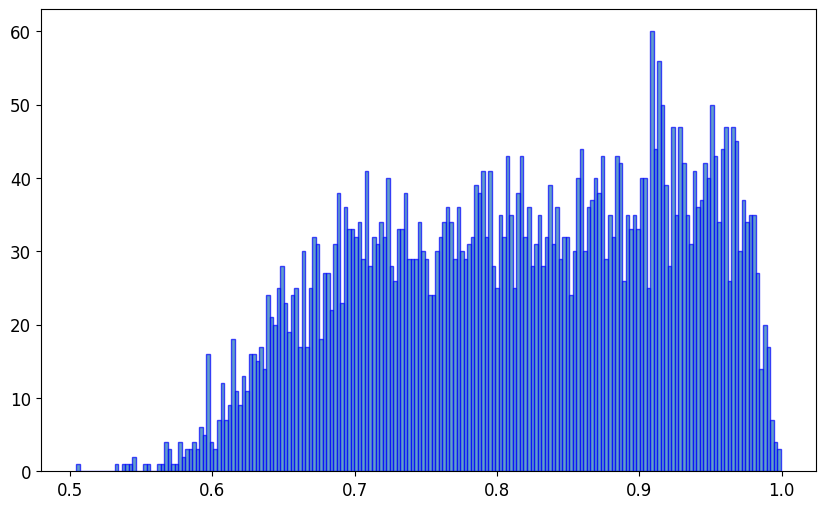

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
distance["distance"].hist(bins=200, ax=ax, edgecolor="b", alpha=0.7)
ax.set_xticks(np.arange(0.5, 1.05, 0.1))
ax.set_xticklabels([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

In [45]:
print(len(pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/top1_similar_reactions.csv")))
print(len(pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/top3_similar_reactions.csv")))
print(len(pd.read_csv("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/top5_similar_reactions.csv")))


4942
14758
24445


3393

In [3]:
target_embedding = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/embedding_mean.npy")
umap = UMAP(n_components=2)
target_embedding_umap = umap.fit_transform(target_embedding)

save_pickle("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/umap_full.pkl", umap)
np.save("/data1/ReactionT5_neword/task_retrosynthesis/output_ord/embedding_umap_full.npy", target_embedding_umap)

query_embedding = np.load("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/embedding_mean.npy")
query_embedding_umap = umap.transform(query_embedding)
np.save("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/query_embedding_umap_full.npy", query_embedding_umap)

/home/sagawa/miniconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:411: UserWarning: Exited at iteration 369 with accuracies 
[8.43308434e-15 1.22499990e-04 1.11821524e-04 8.41658827e-05]
not reaching the requested tolerance 8.48621129989624e-05.
Use iteration 325 instead with accuracy 
7.115058487540684e-05.

  _, diffusion_map = lobpcg(
/home/sagawa/miniconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:411: UserWarning: Exited postprocessing with accuracies 
[6.08115114e-15 8.36343019e-05 1.00718684e-04 1.00249353e-04]
not reaching the requested tolerance 8.48621129989624e-05.
  _, diffusion_map = lobpcg(
/home/sagawa/miniconda3/lib/python3.11/site-packages/umap/spectral.py:550: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/sagawa/miniconda3/lib/python3.11

# morgan fingerprint

In [2]:
df_target = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_retrosynthesis/output_ord/input_data_v5.csv")
df_query = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_retrosynthesis/output_uspto_test/input_data_v5.csv")


from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')

# target_fp = []
# query_fp = []
# for smiles in df_target["input"]:
#     mol = Chem.MolFromSmiles(smiles)
#     fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
#     target_fp.append(fp)
# for smiles in df_query["input"]:
#     mol = Chem.MolFromSmiles(smiles)
#     fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
#     query_fp.append(fp)

In [ ]:
# from rdkit import DataStructs
# similarity_score = [0 for _ in range(len(query_fp))]
# for i, query in enumerate(query_fp):
#     scores = []
#     for j, target in enumerate(target_fp):
#         scores.append(DataStructs.TanimotoSimilarity(query, target))
#     # store the index of the most similar target
#     similarity_score[i] = np.argmax(scores)

# similarity_score = np.array(similarity_score)
# np.save("/data1/ReactionT5_neword/task_retrosynthesis/output_uspto_test/similar_reactions_index_morgan_tanimoto_v5_radius3.npy", similarity_score)

Mean: 32.08393285371702 Std: 26.243246431295137 Max: 206 Min: 0 Median: 26.0 25%: 14.0 75%: 43.0


/tmp/ipykernel_2193325/862907929.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
/tmp/ipykernel_2193325/862907929.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)


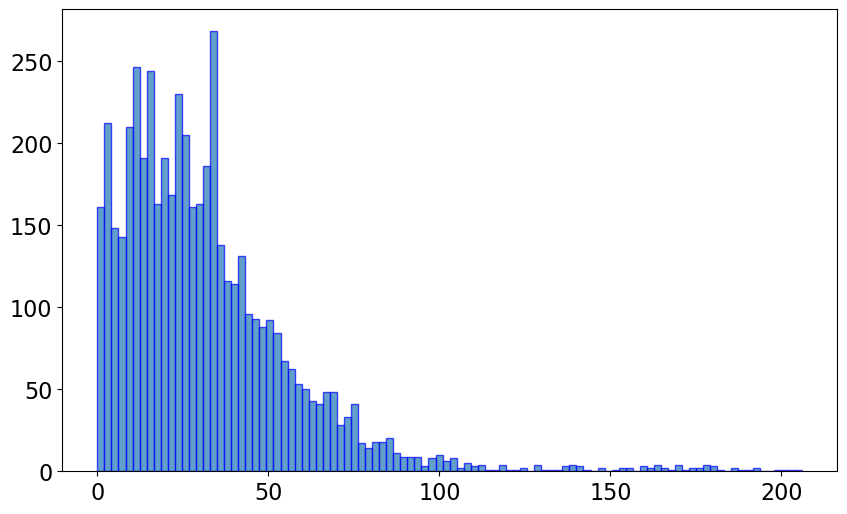

In [5]:
import Levenshtein
similar_reactions = np.load("/mnt/d/ReactionT5_neword_241116/task_retrosynthesis/output_uspto_test/similar_reactions_index_morgan_tanimoto_v5_radius3.npy")
df_similar = df_target.iloc[similar_reactions].reset_index(drop=True)
distances = []
for i in range(len(df_query)):
    distances.append(Levenshtein.distance(df_query["REACTANT"][i], df_similar["REACTANT"][i]))
distances = np.array(distances)
# print statistics
print("Mean:", distances.mean(), "Std:", distances.std(), "Max:", distances.max(), "Min:", distances.min(), "Median:", np.median(distances), "25%:", np.percentile(distances, 25), "75%:", np.percentile(distances, 75))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(distances, bins=100 ,edgecolor="b", alpha=0.7)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

# ReactionT5

Processing batch 0...
Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
5004 5004
Mean: 31.603916866506793 Std: 26.641538532629358 Max: 206 Min: 0 Median: 26.0 25%: 13.0 75%: 43.0


/tmp/ipykernel_2197453/308551308.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
/tmp/ipykernel_2197453/308551308.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)


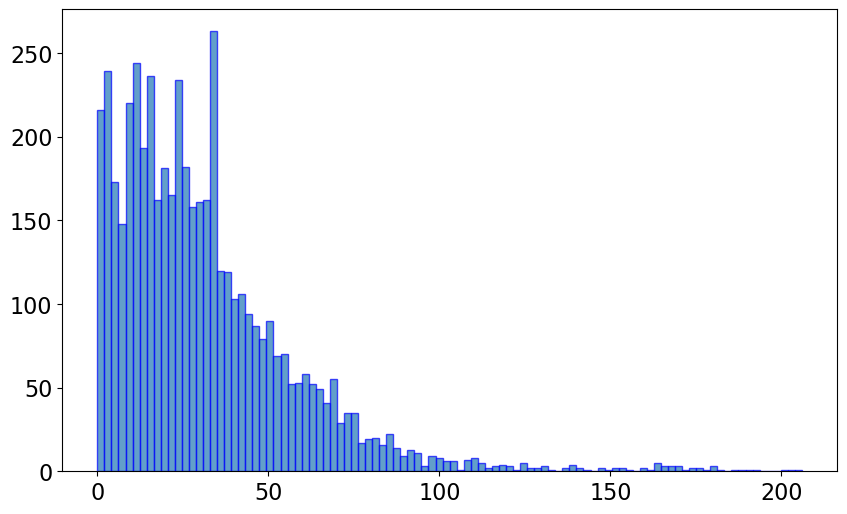

In [3]:
df_target = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_retrosynthesis/output_ord/input_data_v5.csv")
df_query = pd.read_csv("/mnt/d/ReactionT5_neword_241116/task_retrosynthesis/output_uspto_test/input_data_v5.csv")
target_embedding = np.load("/mnt/d/ReactionT5_neword_241116/task_retrosynthesis/output_ord/embedding_mean_v5.npy")
query_embedding = np.load("/mnt/d/ReactionT5_neword_241116/task_retrosynthesis/output_uspto_test/embedding_mean_v5.npy")
import torch
import os
import Levenshtein
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
target_embedding = torch.tensor(target_embedding, dtype=torch.float32).cuda()
query_embedding = torch.tensor(query_embedding, dtype=torch.float32).cuda()

embedding = torch.nn.functional.normalize(target_embedding, p=2, dim=1)
query_embedding = torch.nn.functional.normalize(query_embedding, p=2, dim=1)

batch_size = 1000
nearest_samples = []
similarities = []

for i in range(0, query_embedding.shape[0], batch_size):
    print(f"Processing batch {i//batch_size}...")
    batch = query_embedding[i: i + batch_size]
    similarity = torch.matmul(batch, embedding.T)
    similarity, nearest_sample = torch.topk(similarity, k=1, dim=1)
    nearest_samples.append(nearest_sample.cpu().tolist())
    similarities.append(similarity.cpu().tolist())
nearest_samples = np.concatenate(nearest_samples).flatten()
similarities = np.concatenate(similarities).flatten()

df_similar = df_target.iloc[nearest_samples].reset_index(drop=True)
print(len(df_similar), len(df_query))
distances = []
for i in range(len(df_query)):
    distances.append(Levenshtein.distance(df_query["REACTANT"][i], df_similar["REACTANT"][i]))
distances = np.array(distances)
print("Mean:", distances.mean(), "Std:", distances.std(), "Max:", distances.max(), "Min:", distances.min(), "Median:", np.median(distances), "25%:", np.percentile(distances, 25), "75%:", np.percentile(distances, 75))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(distances, bins=100 ,edgecolor="b", alpha=0.7)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

# T5Chem

In [8]:
df_target = pd.read_csv("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/input_data_v5_retrosynthesis_ord.csv")
df_query = pd.read_csv("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/input_data_v5_retrosynthesis_uspto_test.csv")
target_embedding = np.load("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/ord/embedding.npy")
query_embedding = np.load("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/uspto_test/embedding.npy")

Processing batch 0...
Processing batch 1...
Processing batch 2...
Processing batch 3...
Processing batch 4...
Processing batch 5...
5004 5004
Mean: 34.571143085531574 Std: 28.101832044208745 Max: 332 Min: 0 Median: 29.0 25%: 15.0 75%: 47.0


/tmp/ipykernel_2197453/3253882450.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
/tmp/ipykernel_2197453/3253882450.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)


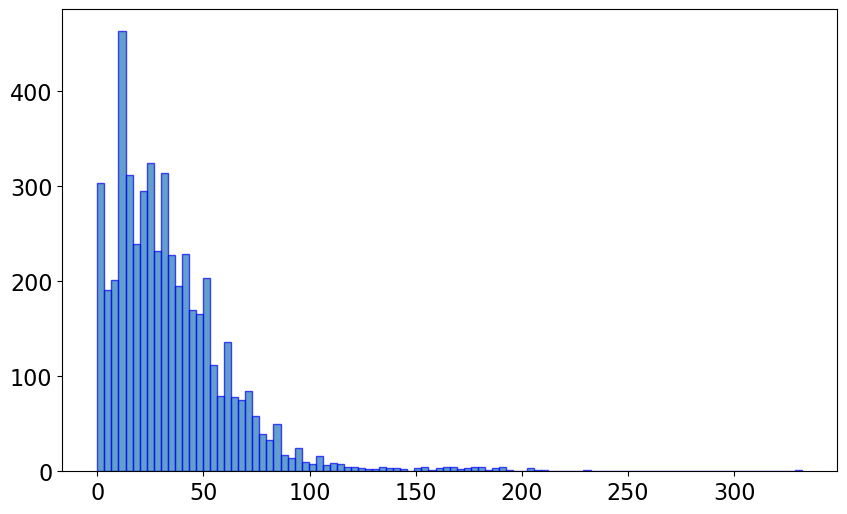

In [5]:
import torch
import os
import Levenshtein
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
target_embedding = torch.tensor(target_embedding, dtype=torch.float32).cuda()
query_embedding = torch.tensor(query_embedding, dtype=torch.float32).cuda()

embedding = torch.nn.functional.normalize(target_embedding, p=2, dim=1)
query_embedding = torch.nn.functional.normalize(query_embedding, p=2, dim=1)

batch_size = 1000
nearest_samples = []
similarities = []

for i in range(0, query_embedding.shape[0], batch_size):
    print(f"Processing batch {i//batch_size}...")
    batch = query_embedding[i: i + batch_size]
    similarity = torch.matmul(batch, embedding.T)
    similarity, nearest_sample = torch.topk(similarity, k=1, dim=1)
    nearest_samples.append(nearest_sample.cpu().tolist())
    similarities.append(similarity.cpu().tolist())
nearest_samples = np.concatenate(nearest_samples).flatten()
similarities = np.concatenate(similarities).flatten()

df_similar = df_target.iloc[nearest_samples].reset_index(drop=True)
print(len(df_similar), len(df_query))
distances = []
for i in range(len(df_query)):
    distances.append(Levenshtein.distance(df_query["REACTANT"][i], df_similar["REACTANT"][i]))
distances = np.array(distances)
print("Mean:", distances.mean(), "Std:", distances.std(), "Max:", distances.max(), "Min:", distances.min(), "Median:", np.median(distances), "25%:", np.percentile(distances, 25), "75%:", np.percentile(distances, 75))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(distances, bins=100 ,edgecolor="b", alpha=0.7)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=16)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=16)
ax.grid(axis="y", alpha=0)
ax.grid(axis="x", alpha=0)

In [9]:
# # apply UMAP and plot
umap = UMAP(n_components=2)
# # sample 10000 points
sample_idx_target = np.random.choice(target_embedding.shape[0], 10000, replace=False)
# sample_idx_query = np.random.choice(query_embedding.shape[0], 10000, replace=False)
target_embedding_sampling = target_embedding[sample_idx_target]
# query_embedding_sampling = query_embedding[sample_idx_query]
target_embedding_umap = umap.fit_transform(target_embedding_sampling)

save_pickle("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/umap_v5.pkl", umap)
np.save("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/ord/embedding_umap_v5.npy", target_embedding_umap)
# umap = load_pickle("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/umap_v5.pkl")

query_embedding_umap = umap.transform(query_embedding)
np.save("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/uspto_test/query_embedding_umap_v5.npy", query_embedding_umap)

# target_embedding_umap = np.load("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/ord/embedding_umap_v5.npy")
# query_embedding_umap = np.load("/mnt/d/ReactionT5_neword_241116/embedding_experiment_new_250321/retrosynthesis/uspto_test/query_embedding_umap_v5.npy")

In [10]:
# calculate the molecular weight
from rdkit import Chem
from rdkit.Chem import Descriptors
# silence warning
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.warning')
from transformers import AutoTokenizer 


df_target = df_target.iloc[sample_idx_target].reset_index(drop=True)
# df_query = df_query.iloc[sample_idx_query].reset_index(drop=True)

# df_target["input"] = df_target["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))
# df_query["input"] = df_query["input"].apply(lambda x: x.replace("REACTANT:", "").replace("REAGENT:", ".").replace(". ", ""))

for df in [df_target, df_query]:
    df["mol"] = df["input"].apply(Chem.MolFromSmiles)
    df["mw"] = df["mol"].apply(Descriptors.MolWt)

In [11]:
# for each feature, clip with 5% and 95% percentile
features = ["mw"]
for feature in features:
    lower = df_target[feature].quantile(0.05)
    upper = df_target[feature].quantile(0.95)
    df_target[feature] = df_target[feature].clip(lower, upper)
    lower = df_query[feature].quantile(0.05)
    upper = df_query[feature].quantile(0.95)
    df_query[feature] = df_query[feature].clip(lower, upper)

/tmp/ipykernel_2197453/2853554755.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_2197453/2853554755.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


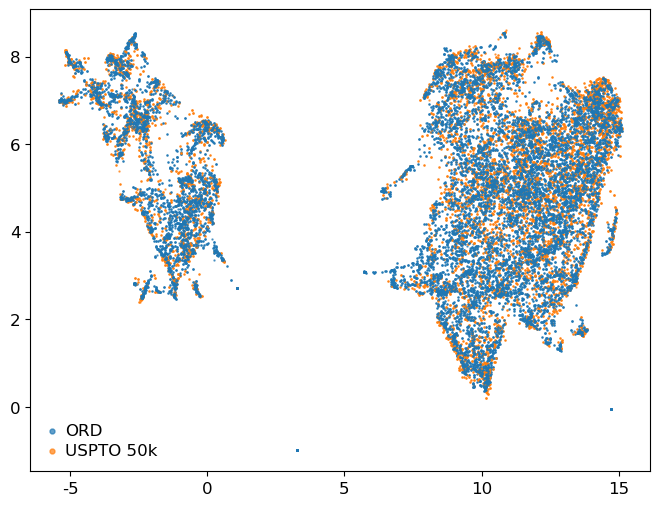

In [14]:
# color by molecular weight
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
for i in range(0, 10000, 200):
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, color="#1f77b4")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO 50k" if i == 0 else None, color="#ff7f0e")
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='best',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_2197453/3501343987.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_2197453/3501343987.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


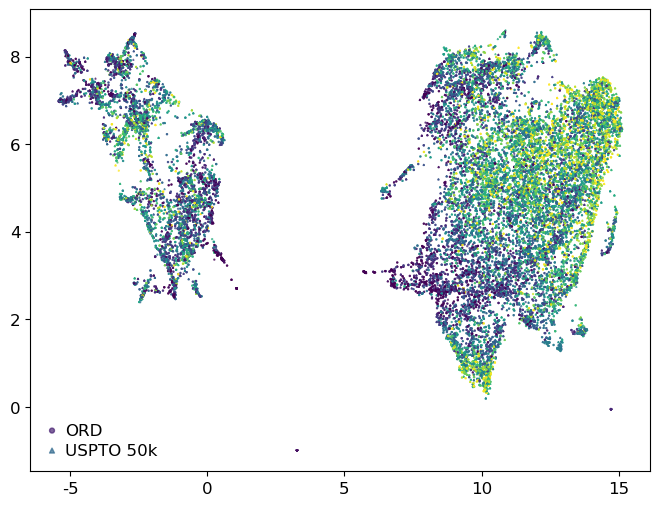

In [15]:
# color by molecular weight
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
for i in range(0, 10000, 200):
    # ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
    # ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO MIT", c=cmap(norm(df_query["mw"])), marker="^")
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, c=cmap(norm(df_target["mw"][i:i+500])), marker="o")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO 50k" if i == 0 else None, c=cmap(norm(df_query["mw"][i:i+500])), marker="^")
# plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='best',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()

/tmp/ipykernel_2197453/1575245133.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
/tmp/ipykernel_2197453/1575245133.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)


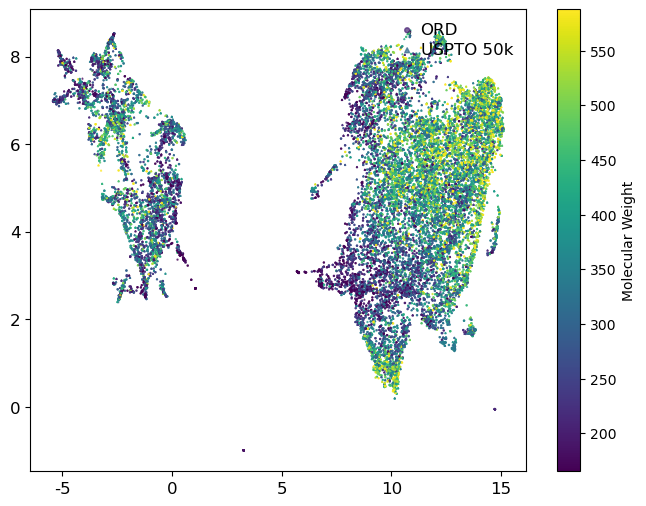

In [16]:
# color by molecular weight
cmap = plt.get_cmap("viridis")
norm = plt.Normalize(min(df_target["mw"].min(), df_query["mw"].min()), max(df_target["mw"].max(), df_query["mw"].max()))
fig, ax = plt.subplots(1, 1, figsize=(8, 6))    
for i in range(0, 10000, 200):
    # ax.scatter(target_embedding_umap[:, 0], target_embedding_umap[:, 1], alpha=0.5, s=5, label="ORD", c=cmap(norm(df_target["mw"])), marker="o")
    # ax.scatter(query_embedding_umap[:, 0], query_embedding_umap[:, 1], alpha=0.5, s=5, label="USPTO 50k", c=cmap(norm(df_query["mw"])), marker="^")
    ax.scatter(target_embedding_umap[i:i+500, 0], target_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="ORD" if i == 0 else None, c=cmap(norm(df_target["mw"][i:i+500])), marker="o")
    ax.scatter(query_embedding_umap[i:i+500, 0], query_embedding_umap[i:i+500, 1], alpha=0.7, s=0.5, label="USPTO 50k" if i == 0 else None, c=cmap(norm(df_query["mw"][i:i+500])), marker="^")
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="Molecular Weight")
# ax.set_xlim(-8, 8)
# ax.set_ylim(-7, 3)
ax.set_xticklabels([int(i) for i in ax.get_xticks()], fontsize=12)
ax.set_yticklabels([int(i) for i in ax.get_yticks()], fontsize=12)
ax.legend(  
    loc='upper right',
    fontsize=12,
    markerscale=5,
    frameon=False,
    labelspacing=0.3,
    borderpad=0.3,
    handletextpad=0.3,
    handlelength=1
)
plt.show()